<H1> Priprema podataka </H1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [2]:
data=pd.read_csv('data/train.csv')
test_data=pd.read_csv('data/test.csv')

In [3]:
data

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,01-08-88,Salaried,26-10-18,6,3705,1,0,0,1,0,0,735,D-Very Low Risk,4,3,0,390443,416133,416133,0,0,0,0,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,05-12-88,Self employed,23-10-18,6,3705,1,0,0,1,0,0,825,A-Very Low Risk,1,0,0,0,0,0,0,0,0,0,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,01-06-76,Salaried,24-10-18,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,26-03-94,Salaried,29-09-18,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [4]:
data.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [6]:
data['loan_default'].value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

Izrazit je disbalans target klase.

In [7]:
data.isna().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

Možemo da primetimo da je jedino <b>Employment.Type</b> ima nedostajuće vrednosti, a kako je to kategorička promenljiva, nedostajuće vrednosti ćemo nadomestiti, to jest popuniti najučestalijom vrednošću datog atributa.

In [8]:
most_frequent_value=data['Employment.Type'].mode()[0]
most_frequent_value

'Self employed'

Uviđamo da je najfrekventnija vrednost <i>Self employed</i>, stoga će 7661 instanca koja je za dati atribut imala vrednost NaN imputirati prethodno pomenuti na njegovo mesto.

In [9]:
data['Employment.Type']=data['Employment.Type'].fillna('Self employed')
data['Employment.Type'].value_counts()

Self employed    135296
Salaried          97858
Name: Employment.Type, dtype: int64

In [10]:
data.isna().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

Nemamo više nedostajućih vrednosti

<h1>Transformacija tipa podataka</h1>

In [11]:
data['loan_default']=data['loan_default'].astype('object')

Izvršićemo konverziju kategoričkog atributa Employment.Type u numerički

In [12]:
data_employed=pd.get_dummies(data['Employment.Type'])
data_employed

,Salaried,Self employed
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
233149,1,0
233150,0,1
233151,1,0
233152,1,0


In [13]:
data_employed.drop('Salaried', axis=1, inplace=True)
data.drop('Employment.Type', axis=1, inplace=True)

In [14]:
data=pd.concat([data,data_employed], axis=1)
data

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Self employed
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,1
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,01-08-88,26-10-18,6,3705,1,0,0,1,0,0,735,D-Very Low Risk,4,3,0,390443,416133,416133,0,0,0,0,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,05-12-88,23-10-18,6,3705,1,0,0,1,0,0,825,A-Very Low Risk,1,0,0,0,0,0,0,0,0,0,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0,1
233151,613658,33484,71212,48.45,77,22186,86,2299,01-06-76,24-10-18,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,26-03-94,29-09-18,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0


In [15]:
for col in data.columns:
    print(f"{col}: {data[col].nunique()}, {data[col].dtype}")

UniqueID: 233154, int64
disbursed_amount: 24565, int64
asset_cost: 46252, int64
ltv: 6579, float64
branch_id: 82, int64
supplier_id: 2953, int64
manufacturer_id: 11, int64
Current_pincode_ID: 6698, int64
Date.of.Birth: 15433, object
DisbursalDate: 84, object
State_ID: 22, int64
Employee_code_ID: 3270, int64
MobileNo_Avl_Flag: 1, int64
Aadhar_flag: 2, int64
PAN_flag: 2, int64
VoterID_flag: 2, int64
Driving_flag: 2, int64
Passport_flag: 2, int64
PERFORM_CNS.SCORE: 573, int64
PERFORM_CNS.SCORE.DESCRIPTION: 20, object
PRI.NO.OF.ACCTS: 108, int64
PRI.ACTIVE.ACCTS: 40, int64
PRI.OVERDUE.ACCTS: 22, int64
PRI.CURRENT.BALANCE: 71341, int64
PRI.SANCTIONED.AMOUNT: 44390, int64
PRI.DISBURSED.AMOUNT: 47909, int64
SEC.NO.OF.ACCTS: 37, int64
SEC.ACTIVE.ACCTS: 23, int64
SEC.OVERDUE.ACCTS: 9, int64
SEC.CURRENT.BALANCE: 3246, int64
SEC.SANCTIONED.AMOUNT: 2223, int64
SEC.DISBURSED.AMOUNT: 2553, int64
PRIMARY.INSTAL.AMT: 28067, int64
SEC.INSTAL.AMT: 1918, int64
NEW.ACCTS.IN.LAST.SIX.MONTHS: 26, int64
DELI

In [16]:
data.shape

(233154, 41)

In [17]:
data=data.drop(['UniqueID'], axis=1)
data

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Self employed
0,50578,58400,89.55,67,22807,45,1441,01-01-84,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0
1,47145,65550,73.23,67,22807,45,1502,31-07-85,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1,1
2,53278,61360,89.63,67,22807,45,1497,24-08-85,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,1
3,57513,66113,88.48,67,22807,45,1501,30-12-93,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1,1
4,52378,60300,88.39,67,22807,45,1495,09-12-77,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,63213,105405,60.72,34,20700,48,1050,01-08-88,26-10-18,6,3705,1,0,0,1,0,0,735,D-Very Low Risk,4,3,0,390443,416133,416133,0,0,0,0,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0,0
233150,73651,100600,74.95,34,23775,51,990,05-12-88,23-10-18,6,3705,1,0,0,1,0,0,825,A-Very Low Risk,1,0,0,0,0,0,0,0,0,0,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0,1
233151,33484,71212,48.45,77,22186,86,2299,01-06-76,24-10-18,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0
233152,34259,73286,49.10,77,22186,86,2299,26-03-94,29-09-18,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0


In [18]:
def age(duration):
    year=int(duration.split('-')[2])
    if year>=0 and year<=21:
        return 2023-(year+2000)
    else:
        return 2023-(year+1900)
    
data['Date.of.Birth']=data['Date.of.Birth'].apply(age)

In [19]:
data

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Self employed
0,50578,58400,89.55,67,22807,45,1441,39,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0
1,47145,65550,73.23,67,22807,45,1502,38,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1,1
2,53278,61360,89.63,67,22807,45,1497,38,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,1
3,57513,66113,88.48,67,22807,45,1501,30,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1,1
4,52378,60300,88.39,67,22807,45,1495,46,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,63213,105405,60.72,34,20700,48,1050,35,26-10-18,6,3705,1,0,0,1,0,0,735,D-Very Low Risk,4,3,0,390443,416133,416133,0,0,0,0,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0,0
233150,73651,100600,74.95,34,23775,51,990,35,23-10-18,6,3705,1,0,0,1,0,0,825,A-Very Low Risk,1,0,0,0,0,0,0,0,0,0,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0,1
233151,33484,71212,48.45,77,22186,86,2299,47,24-10-18,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0
233152,34259,73286,49.10,77,22186,86,2299,29,29-09-18,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0


In [20]:
data['Age_of_customer']=data['Date.of.Birth']
data=data.drop('Date.of.Birth', axis=1)

In [21]:
data

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Self employed,Age_of_customer
0,50578,58400,89.55,67,22807,45,1441,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0,39
1,47145,65550,73.23,67,22807,45,1502,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1,1,38
2,53278,61360,89.63,67,22807,45,1497,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,1,38
3,57513,66113,88.48,67,22807,45,1501,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1,1,30
4,52378,60300,88.39,67,22807,45,1495,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,1,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,63213,105405,60.72,34,20700,48,1050,26-10-18,6,3705,1,0,0,1,0,0,735,D-Very Low Risk,4,3,0,390443,416133,416133,0,0,0,0,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0,0,35
233150,73651,100600,74.95,34,23775,51,990,23-10-18,6,3705,1,0,0,1,0,0,825,A-Very Low Risk,1,0,0,0,0,0,0,0,0,0,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0,1,35
233151,33484,71212,48.45,77,22186,86,2299,24-10-18,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0,47
233152,34259,73286,49.10,77,22186,86,2299,29-09-18,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0,29


In [22]:
def duration(duration):
    years=int(duration.split(' ')[0].replace('yrs',''))
    months=int(duration.split(' ')[1].replace('mon',''))
    return years*12+months

data['AVERAGE.ACCT.AGE']=data['AVERAGE.ACCT.AGE'].apply(duration)
data['CREDIT.HISTORY.LENGTH']=data['CREDIT.HISTORY.LENGTH'].apply(duration)
data

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Self employed,Age_of_customer
0,50578,58400,89.55,67,22807,45,1441,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39
1,47145,65550,73.23,67,22807,45,1502,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,1,1,38
2,53278,61360,89.63,67,22807,45,1497,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38
3,57513,66113,88.48,67,22807,45,1501,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,1,1,30
4,52378,60300,88.39,67,22807,45,1495,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,63213,105405,60.72,34,20700,48,1050,26-10-18,6,3705,1,0,0,1,0,0,735,D-Very Low Risk,4,3,0,390443,416133,416133,0,0,0,0,0,0,4084,0,0,0,21,39,0,0,0,35
233150,73651,100600,74.95,34,23775,51,990,23-10-18,6,3705,1,0,0,1,0,0,825,A-Very Low Risk,1,0,0,0,0,0,0,0,0,0,0,0,1565,0,0,0,6,6,0,0,1,35
233151,33484,71212,48.45,77,22186,86,2299,24-10-18,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47
233152,34259,73286,49.10,77,22186,86,2299,29-09-18,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29


In [23]:
data.select_dtypes(include='object').columns

Index(['DisbursalDate', 'PERFORM_CNS.SCORE.DESCRIPTION', 'loan_default'], dtype='object')

In [24]:
categorical_var = data.select_dtypes('object').columns

for var in categorical_var:
    print(data[var].value_counts())

31-10-18    8826
24-10-18    6701
31-08-18    6690
23-10-18    6440
26-10-18    6215
            ... 
26-08-18     705
12-08-18     572
13-09-18     330
05-08-18      42
02-10-18      25
Name: DisbursalDate, Length: 84, dtype: int64
No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                               

Ono što možemo da zapazimo jeste da kod atributa <b>DisbursalDate</b> (identifikator godine isplate) imamo samo jednu godinu - 2018. To nam ne omogućava da izvršimo diferencijaciju klijenata, stoga ćemo ga izbaciti iz dalje analize. 

In [25]:
data.drop(['DisbursalDate'],axis=1, inplace=True)

In [26]:
values = data['PERFORM_CNS.SCORE.DESCRIPTION'].unique()
frequency =  data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

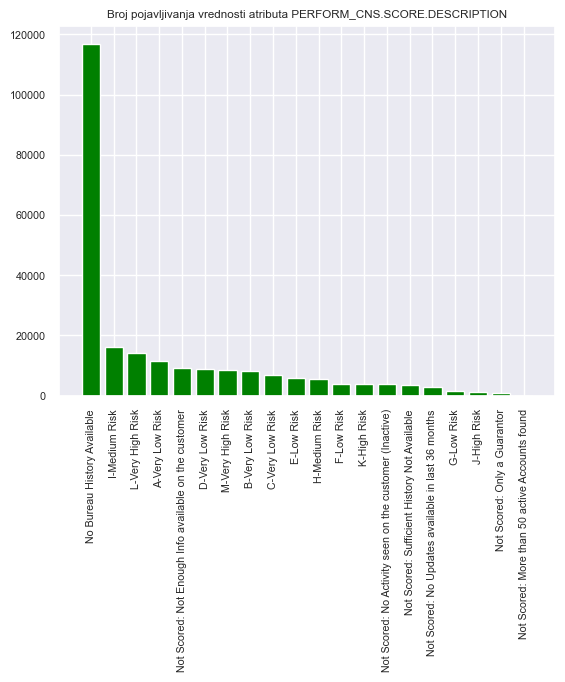

In [27]:
sns.set(font_scale=0.7)
plt.bar(values, frequency, color='green')
plt.title('Broj pojavljivanja vrednosti atributa PERFORM_CNS.SCORE.DESCRIPTION')
plt.xticks(rotation=90)
plt.show()

Atribut <b>PERFORM_CNS.SCORE.DESCRIPTION</b> obiluje kategorijama koje nisu izračunate, to jest podacima koji nam nisu dostupni. Odradićemo grupaciju dostupnih deskripcija. 

In [28]:
def credit_risk(duration):
  d1=[]
  for i in duration:
    p=i.split("-")
    if len(p)==1:
      d1.append('unknown')
    else:
      d1.append(p[0])
  return d1

sub_risk={'unknown':-1, 'A':13, 'B':12, 'C':11, 'D':10, 'E':9, 'F':8, 'G':7, 'H':6, 'I':5, 'J':4, 'K':3, 'L':2, 'M':1}
data.loc[:,'credit_risk_grade']=credit_risk(data["PERFORM_CNS.SCORE.DESCRIPTION"])
data.loc[:,'Credit Risk']=data['credit_risk_grade'].apply(lambda x:sub_risk[x])

In [29]:
data

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Self employed,Age_of_customer,credit_risk_grade,Credit Risk
0,50578,58400,89.55,67,22807,45,1441,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,unknown,-1
1,47145,65550,73.23,67,22807,45,1502,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,1,1,38,I,5
2,53278,61360,89.63,67,22807,45,1497,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,unknown,-1
3,57513,66113,88.48,67,22807,45,1501,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,1,1,30,L,2
4,52378,60300,88.39,67,22807,45,1495,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,46,unknown,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,63213,105405,60.72,34,20700,48,1050,6,3705,1,0,0,1,0,0,735,D-Very Low Risk,4,3,0,390443,416133,416133,0,0,0,0,0,0,4084,0,0,0,21,39,0,0,0,35,D,10
233150,73651,100600,74.95,34,23775,51,990,6,3705,1,0,0,1,0,0,825,A-Very Low Risk,1,0,0,0,0,0,0,0,0,0,0,0,1565,0,0,0,6,6,0,0,1,35,A,13
233151,33484,71212,48.45,77,22186,86,2299,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47,unknown,-1
233152,34259,73286,49.10,77,22186,86,2299,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,unknown,-1


In [30]:
data=data.drop(['PERFORM_CNS.SCORE.DESCRIPTION'],axis=1)
data=data.drop(['credit_risk_grade'],axis=1)
data

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Self employed,Age_of_customer,Credit Risk
0,50578,58400,89.55,67,22807,45,1441,6,1998,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,-1
1,47145,65550,73.23,67,22807,45,1502,6,1998,1,1,0,0,0,0,598,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,1,1,38,5
2,53278,61360,89.63,67,22807,45,1497,6,1998,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,-1
3,57513,66113,88.48,67,22807,45,1501,6,1998,1,1,0,0,0,0,305,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,1,1,30,2
4,52378,60300,88.39,67,22807,45,1495,6,1998,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,46,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,63213,105405,60.72,34,20700,48,1050,6,3705,1,0,0,1,0,0,735,4,3,0,390443,416133,416133,0,0,0,0,0,0,4084,0,0,0,21,39,0,0,0,35,10
233150,73651,100600,74.95,34,23775,51,990,6,3705,1,0,0,1,0,0,825,1,0,0,0,0,0,0,0,0,0,0,0,1565,0,0,0,6,6,0,0,1,35,13
233151,33484,71212,48.45,77,22186,86,2299,4,3479,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47,-1
233152,34259,73286,49.10,77,22186,86,2299,4,3479,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,-1


In [31]:
for col in data.columns:
  x=data[col].value_counts(normalize=True)
  x.name=col
  print(x)
  print('\n')

48349    0.009178
53303    0.009114
51303    0.008544
50303    0.008406
55259    0.008093
           ...   
69508    0.000004
61342    0.000004
64948    0.000004
44306    0.000004
34259    0.000004
Name: disbursed_amount, Length: 24565, dtype: float64


68000     0.002921
67000     0.002556
72000     0.002312
70000     0.002166
74000     0.002012
            ...   
104745    0.000004
88461     0.000004
233589    0.000004
59411     0.000004
116009    0.000004
Name: asset_cost, Length: 46252, dtype: float64


85.00    0.019000
84.99    0.004418
79.99    0.002320
80.00    0.002102
75.00    0.001801
           ...   
32.74    0.000004
92.77    0.000004
91.05    0.000004
90.06    0.000004
33.82    0.000004
Name: ltv, Length: 6579, dtype: float64


2      0.056349
67     0.048586
3      0.039588
5      0.039536
36     0.037881
         ...   
217    0.000785
261    0.000755
84     0.000669
111    0.000382
158    0.000296
Name: branch_id, Length: 82, dtype: float64


18317    0.006142
15694  

Vidimo da atribut <b>MobileNo_Avl_Flag</b> ima samo jednu vrednost za sve opservacije, stoga ćemo ga izbaciti iz daljeg razmatranja.

In [32]:
data.drop(['MobileNo_Avl_Flag'],axis=1,inplace=True)
data

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Self employed,Age_of_customer,Credit Risk
0,50578,58400,89.55,67,22807,45,1441,6,1998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,-1
1,47145,65550,73.23,67,22807,45,1502,6,1998,1,0,0,0,0,598,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,1,1,38,5
2,53278,61360,89.63,67,22807,45,1497,6,1998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,-1
3,57513,66113,88.48,67,22807,45,1501,6,1998,1,0,0,0,0,305,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,1,1,30,2
4,52378,60300,88.39,67,22807,45,1495,6,1998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,46,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,63213,105405,60.72,34,20700,48,1050,6,3705,0,0,1,0,0,735,4,3,0,390443,416133,416133,0,0,0,0,0,0,4084,0,0,0,21,39,0,0,0,35,10
233150,73651,100600,74.95,34,23775,51,990,6,3705,0,0,1,0,0,825,1,0,0,0,0,0,0,0,0,0,0,0,1565,0,0,0,6,6,0,0,1,35,13
233151,33484,71212,48.45,77,22186,86,2299,4,3479,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47,-1
233152,34259,73286,49.10,77,22186,86,2299,4,3479,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,-1


In [33]:
data['pomocna_kolona']=data['loan_default']
data.drop('loan_default', axis=1, inplace=True)
data['loan_default']=data['pomocna_kolona']
data.drop('pomocna_kolona',axis=1, inplace=True)

In [34]:
data

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Self employed,Age_of_customer,Credit Risk,loan_default
0,50578,58400,89.55,67,22807,45,1441,6,1998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,-1,0
1,47145,65550,73.23,67,22807,45,1502,6,1998,1,0,0,0,0,598,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,1,38,5,1
2,53278,61360,89.63,67,22807,45,1497,6,1998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,-1,0
3,57513,66113,88.48,67,22807,45,1501,6,1998,1,0,0,0,0,305,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,1,30,2,1
4,52378,60300,88.39,67,22807,45,1495,6,1998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,46,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,63213,105405,60.72,34,20700,48,1050,6,3705,0,0,1,0,0,735,4,3,0,390443,416133,416133,0,0,0,0,0,0,4084,0,0,0,21,39,0,0,35,10,0
233150,73651,100600,74.95,34,23775,51,990,6,3705,0,0,1,0,0,825,1,0,0,0,0,0,0,0,0,0,0,0,1565,0,0,0,6,6,0,1,35,13,0
233151,33484,71212,48.45,77,22186,86,2299,4,3479,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47,-1,0
233152,34259,73286,49.10,77,22186,86,2299,4,3479,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,-1,0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 38 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   disbursed_amount                     233154 non-null  int64  
 1   asset_cost                           233154 non-null  int64  
 2   ltv                                  233154 non-null  float64
 3   branch_id                            233154 non-null  int64  
 4   supplier_id                          233154 non-null  int64  
 5   manufacturer_id                      233154 non-null  int64  
 6   Current_pincode_ID                   233154 non-null  int64  
 7   State_ID                             233154 non-null  int64  
 8   Employee_code_ID                     233154 non-null  int64  
 9   Aadhar_flag                          233154 non-null  int64  
 10  PAN_flag                             233154 non-null  int64  
 11  VoterID_flag 

<h1>Feature engineering</h1>

Prilikom analize izlazne promenljive <b>loan_default</b> i novokreirane varijable <b>Credit Risk</b> možemo da uočimo da klijenti imaju vrednost 0 iz dva potpuno drugačija razloga - ili je izlazna promenljiva 0 kao rezultat nepostojanja kreditne istorije ili posedovanja kreditne istorije u kojoj je zabeleženo da zaduženje nije otplaćeno. Zato uvodimo novi atribut <b>Missing Features</b> kako bismo omogućili modelu da razgraniči te dve grupe ljudi. Klijenti koji nemaju kreditnu istoriju imaće veću vrednost ovog atributa, jer će im za više atributa faliti vrednost.

In [36]:
data['Missing Features']=(data==0).astype(int).sum(axis=1)

In [37]:
data

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Self employed,Age_of_customer,Credit Risk,loan_default,Missing Features
0,50578,58400,89.55,67,22807,45,1441,6,1998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,-1,0,26
1,47145,65550,73.23,67,22807,45,1502,6,1998,1,0,0,0,0,598,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,1,38,5,1,13
2,53278,61360,89.63,67,22807,45,1497,6,1998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,-1,0,25
3,57513,66113,88.48,67,22807,45,1501,6,1998,1,0,0,0,0,305,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,1,30,2,1,18
4,52378,60300,88.39,67,22807,45,1495,6,1998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,46,-1,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,63213,105405,60.72,34,20700,48,1050,6,3705,0,0,1,0,0,735,4,3,0,390443,416133,416133,0,0,0,0,0,0,4084,0,0,0,21,39,0,0,35,10,0,17
233150,73651,100600,74.95,34,23775,51,990,6,3705,0,0,1,0,0,825,1,0,0,0,0,0,0,0,0,0,0,0,1565,0,0,0,6,6,0,1,35,13,0,20
233151,33484,71212,48.45,77,22186,86,2299,4,3479,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47,-1,0,26
233152,34259,73286,49.10,77,22186,86,2299,4,3479,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,-1,0,26


<b>AVERAGE.ACCT.AGE</b> i <b>CREDIT.HISTORY.LENGTH</b>

In [38]:
data['AVERAGE.ACCT.AGE'].value_counts()

0      119373
6        6028
7        5366
11       5237
10       5143
        ...  
292         1
191         1
182         1
227         1
188         1
Name: AVERAGE.ACCT.AGE, Length: 192, dtype: int64

In [39]:
data['CREDIT.HISTORY.LENGTH'].value_counts()

0      119127
6        4761
25       4745
7        4017
24       3833
        ...  
367         1
244         1
339         1
423         1
274         1
Name: CREDIT.HISTORY.LENGTH, Length: 294, dtype: int64

Možemo da primetimo da i jedna i druga promenljiva za gotovo 50% opservacija imaju trajanje od 0 godina i 0 meseci, te je smisleno uvesti novu promenljivu koja će nam dati informaciju o tome da li je neko pre imao kredit ili ne. Proveravamo korelisanost ova dva atributa da bismo u korist novokreiranog izbacili navedene.

In [40]:
AvgAccAge=[]
for x in data['AVERAGE.ACCT.AGE']:
    p=0 if x==0 else 1
    AvgAccAge.append(p)
    
data['AvgAccAge']=AvgAccAge
data['AvgAccAge']

0         0
1         1
2         0
3         1
4         0
         ..
233149    1
233150    1
233151    0
233152    0
233153    0
Name: AvgAccAge, Length: 233154, dtype: int64

In [41]:
CreHistLen=[]
for x in data['CREDIT.HISTORY.LENGTH']:
    p=0 if x==0 else 1
    CreHistLen.append(p)
    
data['CreHistLen']=CreHistLen
data['CreHistLen']

0         0
1         1
2         0
3         1
4         0
         ..
233149    1
233150    1
233151    0
233152    0
233153    0
Name: CreHistLen, Length: 233154, dtype: int64

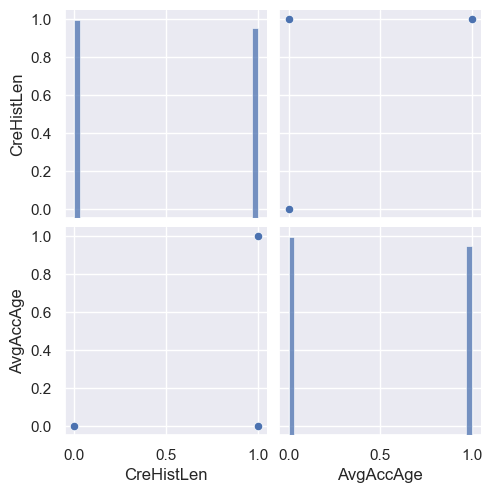

In [42]:
sns.set()
sns.pairplot(data[['CreHistLen','AvgAccAge']])

In [43]:
print(np.corrcoef(data['CreHistLen'], data['AvgAccAge']))

[[1.         0.99789092]
 [0.99789092 1.        ]]


Uviđamo da su date varijable u potpunosti kolerisane, te pravimo novi atribut i izbacuje ova dva.

In [44]:
data['HadCreditBefore']=data['CreHistLen']
data.drop(['CreHistLen'], axis=1, inplace=True)
data.drop(['AvgAccAge'], axis=1, inplace=True)
data.drop(['CREDIT.HISTORY.LENGTH'], axis=1, inplace=True)
data.drop(['AVERAGE.ACCT.AGE'], axis=1, inplace=True)
data

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Self employed,Age_of_customer,Credit Risk,loan_default,Missing Features,HadCreditBefore
0,50578,58400,89.55,67,22807,45,1441,6,1998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,-1,0,26,0
1,47145,65550,73.23,67,22807,45,1502,6,1998,1,0,0,0,0,598,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,0,1,38,5,1,13,1
2,53278,61360,89.63,67,22807,45,1497,6,1998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,-1,0,25,0
3,57513,66113,88.48,67,22807,45,1501,6,1998,1,0,0,0,0,305,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,1,1,30,2,1,18,1
4,52378,60300,88.39,67,22807,45,1495,6,1998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,46,-1,1,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,63213,105405,60.72,34,20700,48,1050,6,3705,0,0,1,0,0,735,4,3,0,390443,416133,416133,0,0,0,0,0,0,4084,0,0,0,0,0,35,10,0,17,1
233150,73651,100600,74.95,34,23775,51,990,6,3705,0,0,1,0,0,825,1,0,0,0,0,0,0,0,0,0,0,0,1565,0,0,0,0,1,35,13,0,20,1
233151,33484,71212,48.45,77,22186,86,2299,4,3479,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47,-1,0,26,0
233152,34259,73286,49.10,77,22186,86,2299,4,3479,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,-1,0,26,0


In [45]:
data['pomocna_kolona']=data['loan_default']
data.drop('loan_default', axis=1, inplace=True)
data['loan_default']=data['pomocna_kolona']
data.drop('pomocna_kolona',axis=1, inplace=True)

In [46]:
data

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Self employed,Age_of_customer,Credit Risk,Missing Features,HadCreditBefore,loan_default
0,50578,58400,89.55,67,22807,45,1441,6,1998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,-1,26,0,0
1,47145,65550,73.23,67,22807,45,1502,6,1998,1,0,0,0,0,598,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,0,1,38,5,13,1,1
2,53278,61360,89.63,67,22807,45,1497,6,1998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,-1,25,0,0
3,57513,66113,88.48,67,22807,45,1501,6,1998,1,0,0,0,0,305,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,1,1,30,2,18,1,1
4,52378,60300,88.39,67,22807,45,1495,6,1998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,46,-1,23,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,63213,105405,60.72,34,20700,48,1050,6,3705,0,0,1,0,0,735,4,3,0,390443,416133,416133,0,0,0,0,0,0,4084,0,0,0,0,0,35,10,17,1,0
233150,73651,100600,74.95,34,23775,51,990,6,3705,0,0,1,0,0,825,1,0,0,0,0,0,0,0,0,0,0,0,1565,0,0,0,0,1,35,13,20,1,0
233151,33484,71212,48.45,77,22186,86,2299,4,3479,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47,-1,26,0,0
233152,34259,73286,49.10,77,22186,86,2299,4,3479,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,-1,26,0,0


<h1>Provera važnosti numeričkih prediktora</h1>

Ispitaćemo u kojoj meri je svaki od atributa korelisan sa izlaznom promenljivom i poređaćemo atribute po važnosti pomoću SelectKBest

In [47]:
X=data.drop('loan_default', axis=1)
y=data['loan_default']

In [48]:
from sklearn.feature_selection import SelectKBest, f_classif 
# f_classif = koristi za selekciju featurea i procenu značajnosti svakog featurea u kontekstu mašinskog učenja

print(f_classif(X,y))
selection=SelectKBest(k=10, score_func=f_classif)
selection.fit(X,y)
selection.get_support()


(array([1.41523644e+03, 4.74294771e+01, 2.27059640e+03, 2.12745939e+02,
       1.74621668e+02, 1.46269403e+02, 1.88450364e+02, 5.40101987e+02,
       9.95290062e+01, 4.04045749e+02, 9.76356381e-01, 4.47061984e+02,
       7.90173169e+00, 1.34758500e+01, 7.85040202e+02, 2.93468277e+02,
       4.01279644e+02, 3.90129366e+02, 1.74989641e+02, 2.97986363e+01,
       2.90182332e+01, 1.63930490e+01, 8.37446594e+00, 4.37968022e-01,
       7.13394390e+00, 9.41445499e+00, 9.10289860e+00, 2.62783080e+01,
       5.59051456e-01, 2.01697216e+02, 2.77221547e+02, 4.45646642e+02,
       1.84026174e+02, 3.24604176e+02, 1.16308197e+03, 1.01083524e+03,
       2.96720847e+02]), array([8.74561717e-309, 5.71622307e-012, 0.00000000e+000, 3.63127882e-048,
       7.48479563e-040, 1.16022054e-033, 7.19936443e-043, 2.45121215e-119,
       1.95416447e-023, 8.64068147e-090, 3.23101041e-001, 3.89836778e-099,
       4.93916126e-003, 2.41707571e-004, 1.86942112e-172, 9.57657514e-066,
       3.44862748e-089, 9.13848841e

array([ True, False,  True, False, False, False, False,  True, False,
        True, False,  True, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True,  True,
       False])

<Axes: ylabel='att'>

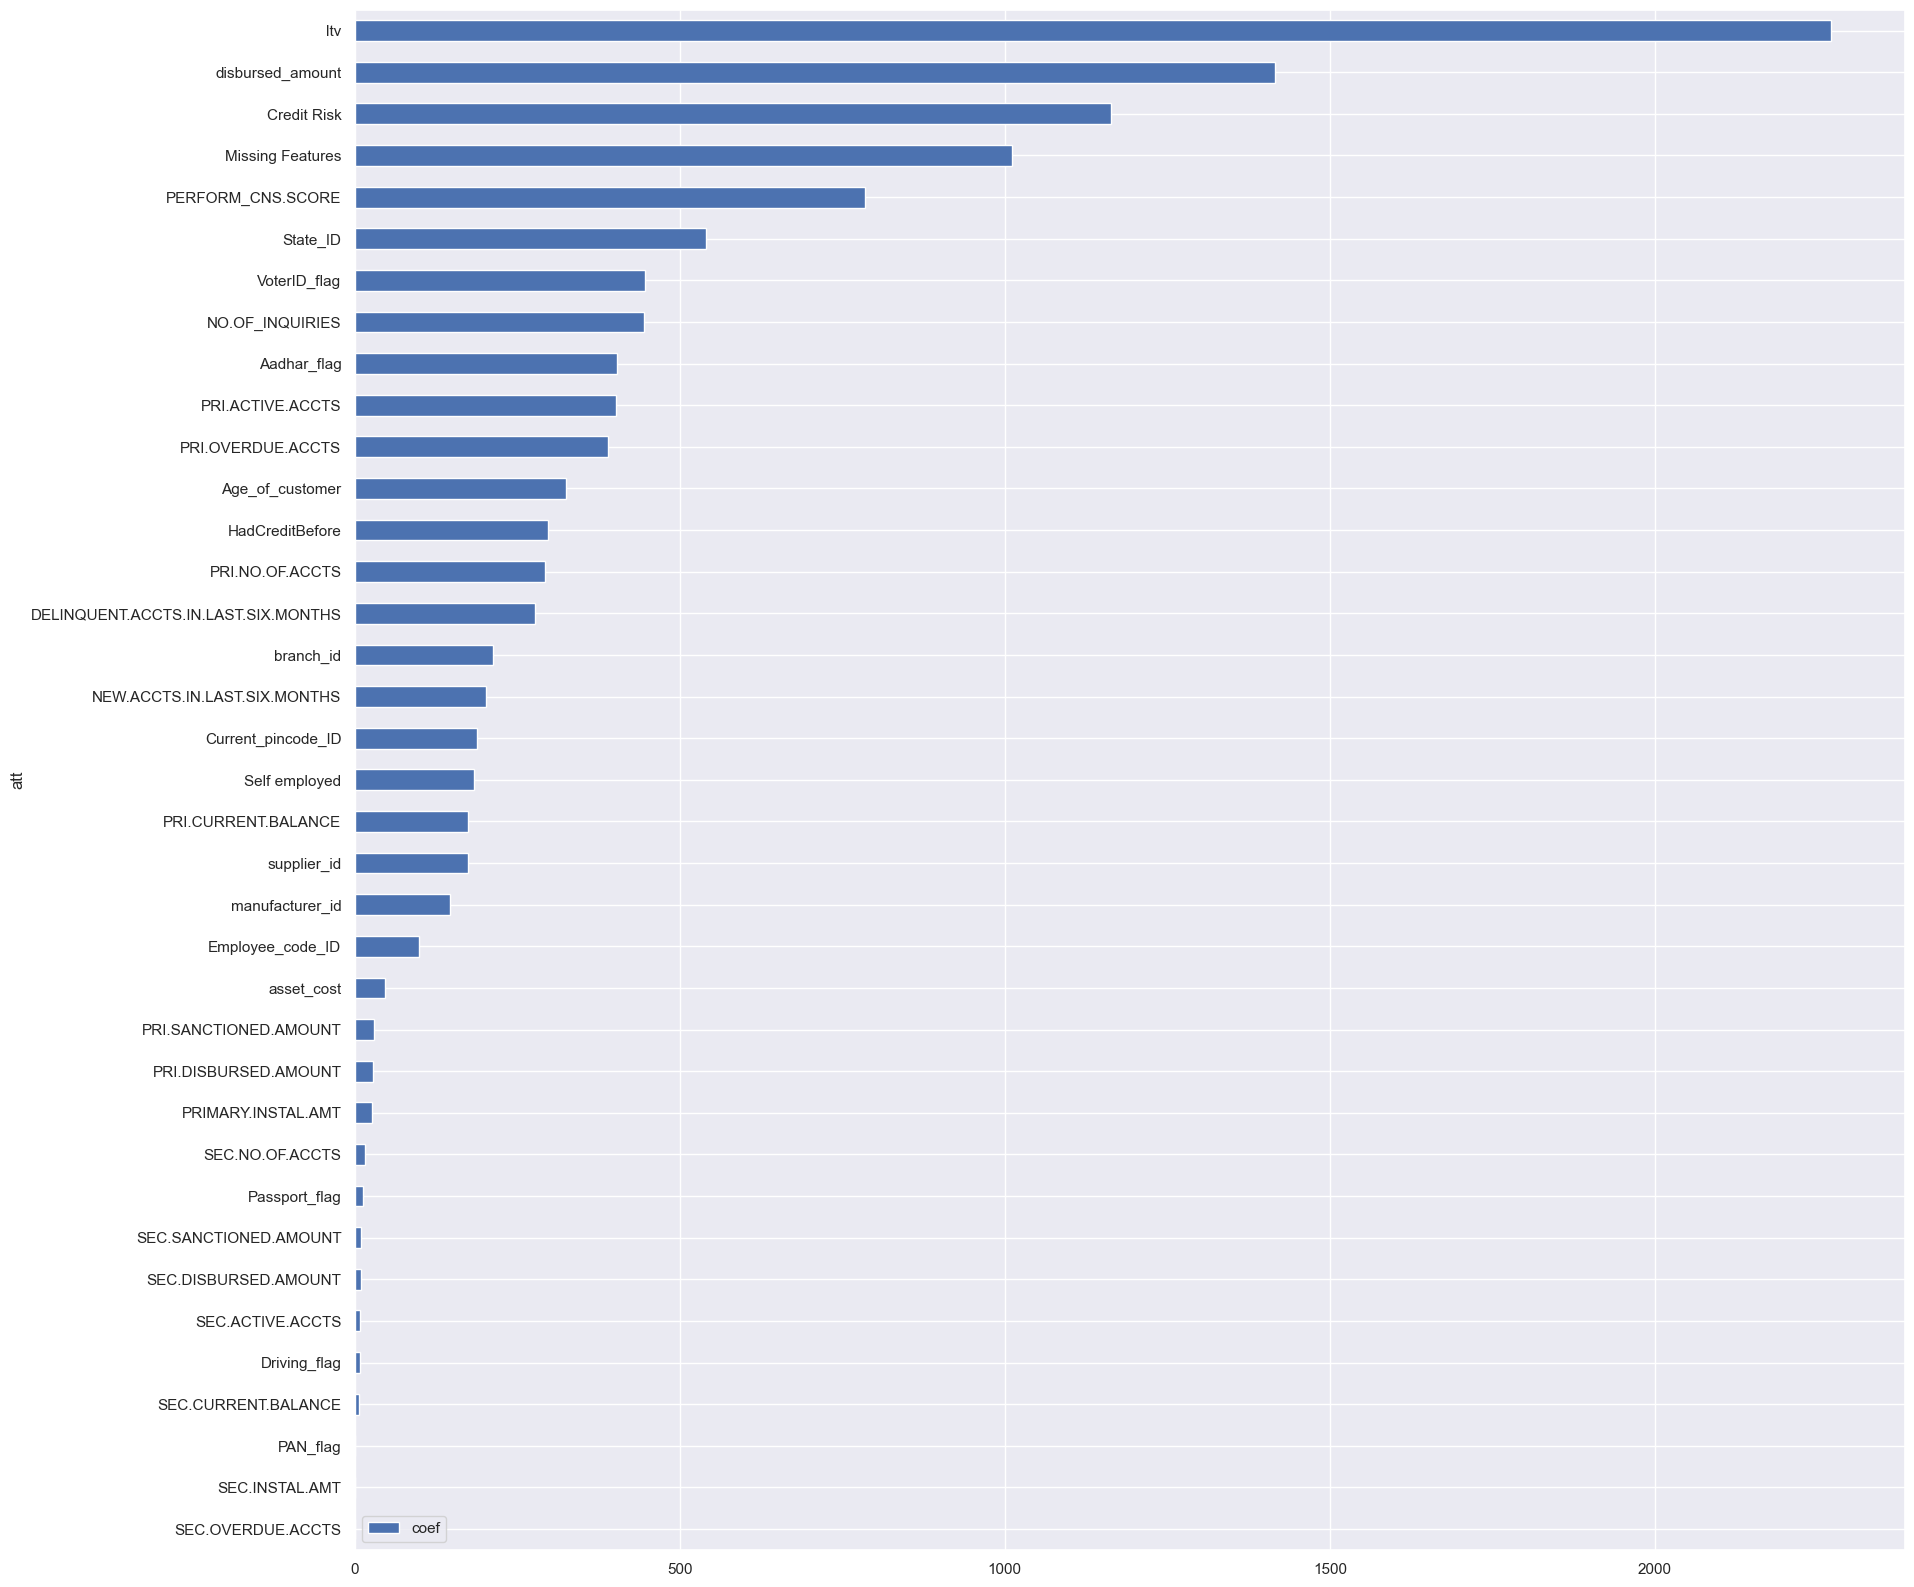

In [49]:
coefs=pd.DataFrame({'att':X.columns,'coef':f_classif(X,y)[0]}).sort_values(by='coef',ascending=True)
coefs.plot.barh(x='att',y='coef',figsize=(20,20))

Vidimo da su svi podaci o sekundarnim acc lošiji prediktori, pa ćemo onda njih kombinovati zajedno sa informacijama o primarnim nalozima.

In [50]:
data.loc[:,'No of Accounts'] = data['PRI.NO.OF.ACCTS'] + data['SEC.NO.OF.ACCTS']
data.loc[:,'Active Accounts'] = data['PRI.ACTIVE.ACCTS'] + data['SEC.ACTIVE.ACCTS']
data.loc[:,'Total Overdue Accounts'] =data['PRI.OVERDUE.ACCTS'] + data['SEC.OVERDUE.ACCTS']
data.loc[:,'Total Current Balance'] = data['PRI.CURRENT.BALANCE'] + data['SEC.CURRENT.BALANCE']
data.loc[:,'Total Sanctioned Amount'] = data['PRI.SANCTIONED.AMOUNT'] + data['SEC.SANCTIONED.AMOUNT']
data.loc[:,'Total Disbursed Amount'] = data['PRI.DISBURSED.AMOUNT'] + data['SEC.DISBURSED.AMOUNT']
data.loc[:,'Total Installment'] = data['PRIMARY.INSTAL.AMT'] + data['SEC.INSTAL.AMT']

In [51]:
data=data.drop(['PRI.NO.OF.ACCTS','SEC.NO.OF.ACCTS','PRI.ACTIVE.ACCTS','SEC.ACTIVE.ACCTS',
            'PRI.OVERDUE.ACCTS','SEC.OVERDUE.ACCTS','PRI.CURRENT.BALANCE', 'SEC.CURRENT.BALANCE',
            'PRI.SANCTIONED.AMOUNT','SEC.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT','SEC.DISBURSED.AMOUNT',
            'PRIMARY.INSTAL.AMT','SEC.INSTAL.AMT','Passport_flag','Driving_flag','PAN_flag'],axis=1)

In [52]:
data

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,Aadhar_flag,VoterID_flag,PERFORM_CNS.SCORE,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Self employed,Age_of_customer,Credit Risk,Missing Features,HadCreditBefore,loan_default,No of Accounts,Active Accounts,Total Overdue Accounts,Total Current Balance,Total Sanctioned Amount,Total Disbursed Amount,Total Installment
0,50578,58400,89.55,67,22807,45,1441,6,1998,1,0,0,0,0,0,0,39,-1,26,0,0,0,0,0,0,0,0,0
1,47145,65550,73.23,67,22807,45,1502,6,1998,1,0,598,0,1,0,1,38,5,13,1,1,1,1,1,27600,50200,50200,1991
2,53278,61360,89.63,67,22807,45,1497,6,1998,1,0,0,0,0,0,1,38,-1,25,0,0,0,0,0,0,0,0,0
3,57513,66113,88.48,67,22807,45,1501,6,1998,1,0,305,0,0,1,1,30,2,18,1,1,3,0,0,0,0,0,31
4,52378,60300,88.39,67,22807,45,1495,6,1998,1,0,0,0,0,1,1,46,-1,23,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,63213,105405,60.72,34,20700,48,1050,6,3705,0,1,735,0,0,0,0,35,10,17,1,0,4,3,0,390443,416133,416133,4084
233150,73651,100600,74.95,34,23775,51,990,6,3705,0,1,825,0,0,0,1,35,13,20,1,0,1,0,0,0,0,0,1565
233151,33484,71212,48.45,77,22186,86,2299,4,3479,1,0,0,0,0,0,0,47,-1,26,0,0,0,0,0,0,0,0,0
233152,34259,73286,49.10,77,22186,86,2299,4,3479,1,0,0,0,0,0,0,29,-1,26,0,0,0,0,0,0,0,0,0


<Axes: ylabel='att'>

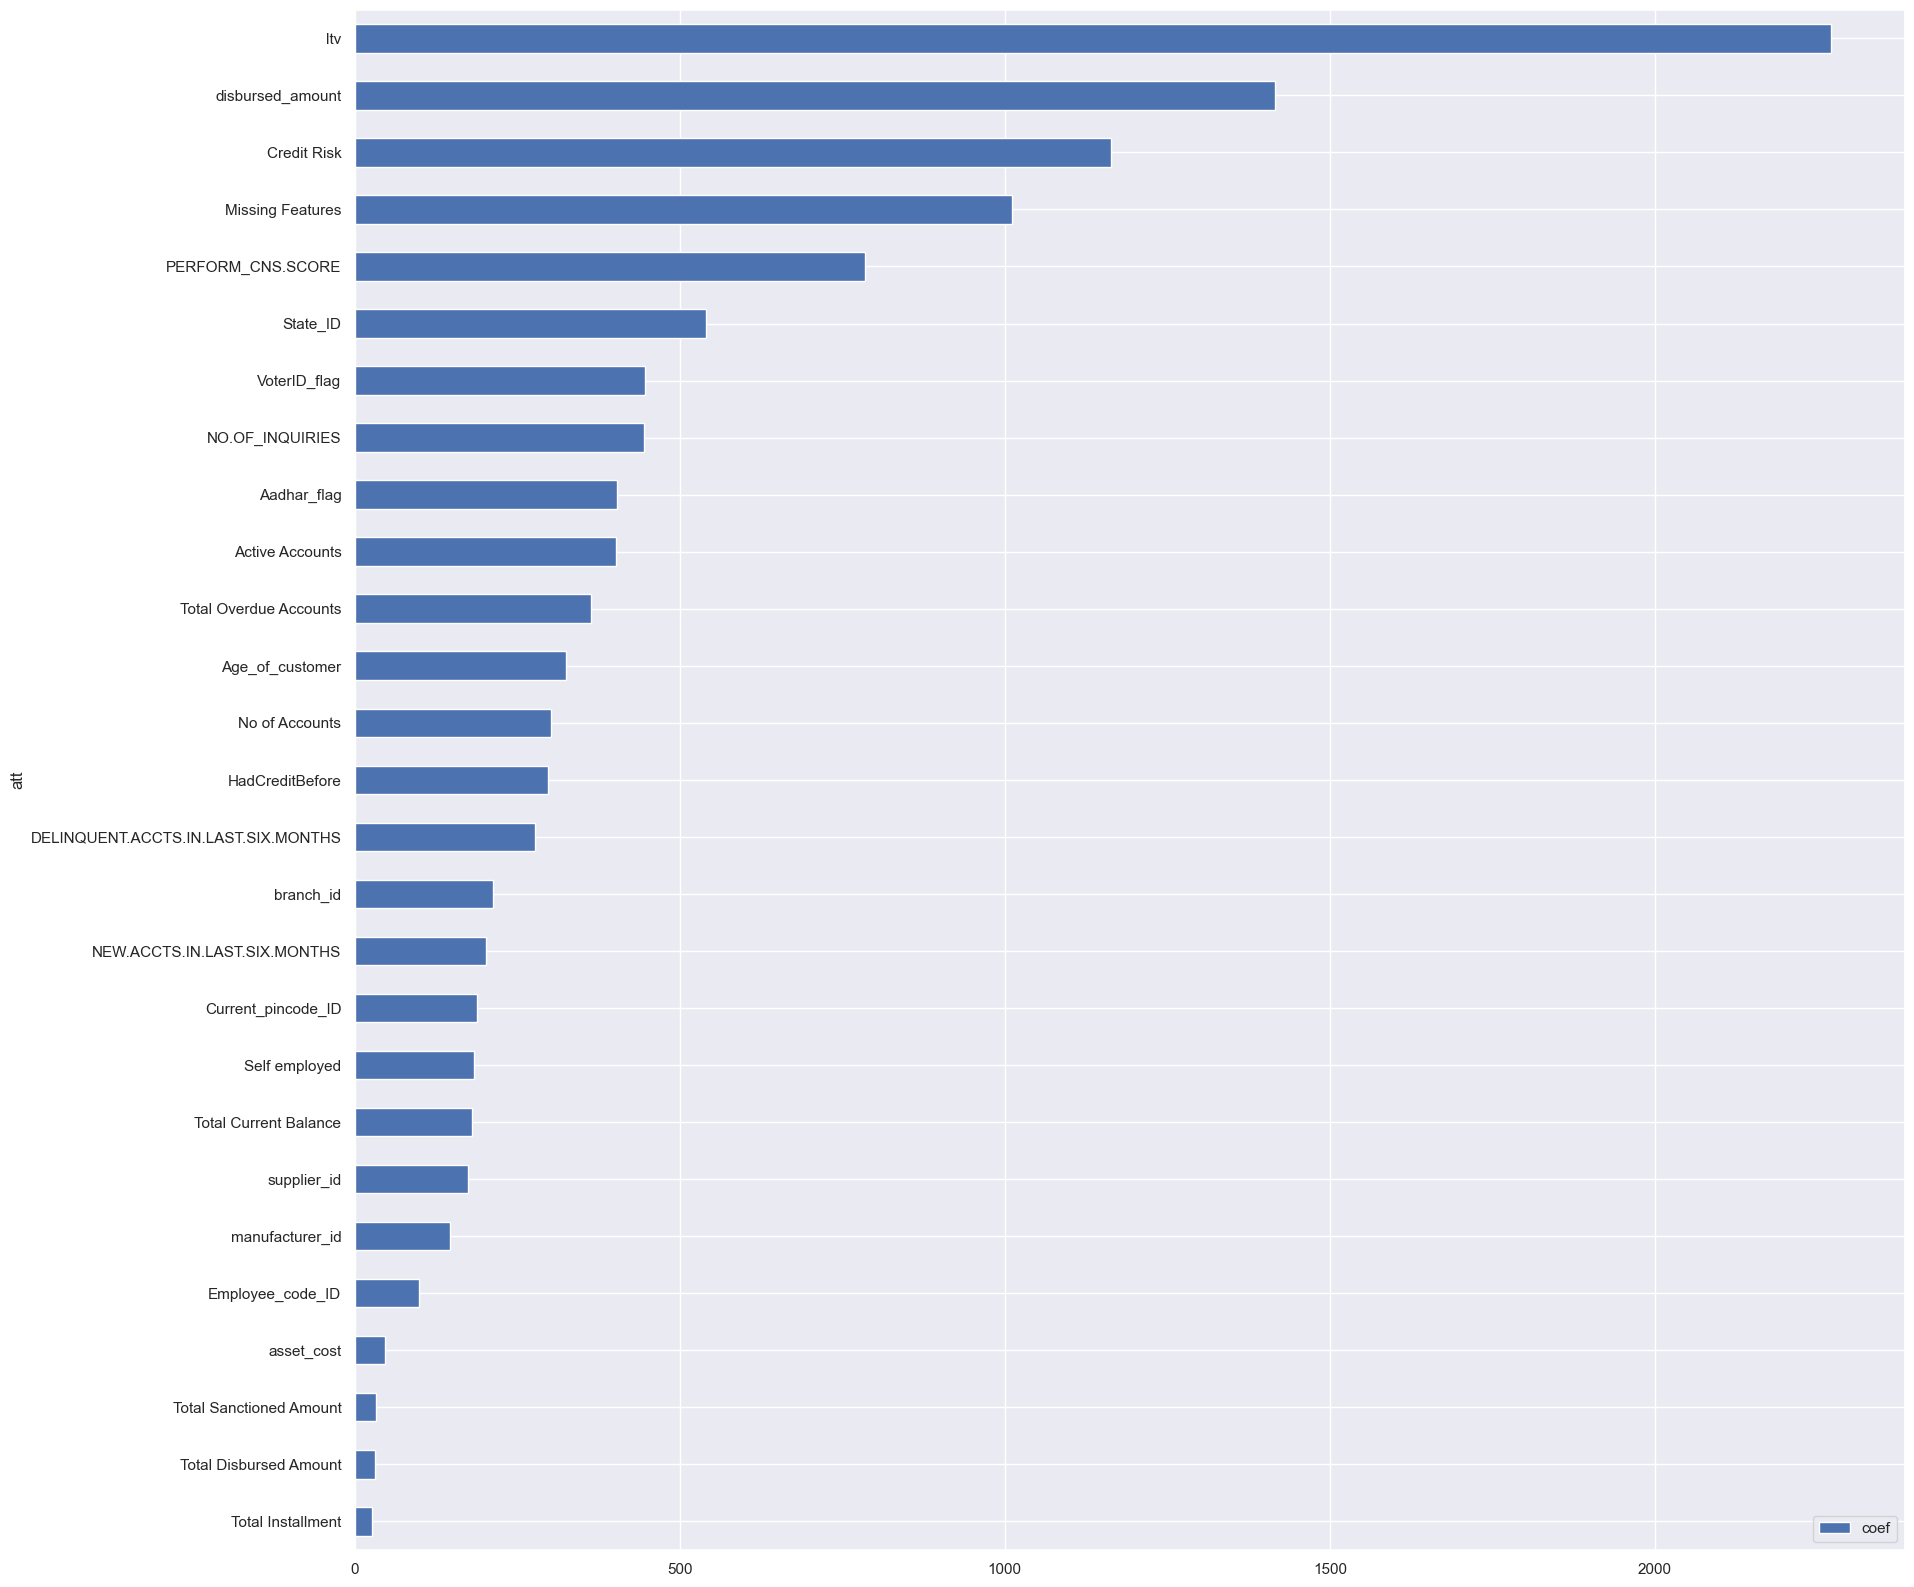

In [53]:
X=data.drop('loan_default',axis=1)
y=data['loan_default']
coefs=pd.DataFrame({'att':X.columns,'coef':f_classif(X,y)[0]}).sort_values(by='coef',ascending=True)
coefs.plot.barh(x='att',y='coef',figsize=(20,20))

Vidimo da su prediktori ovoga puta bolji, ali kako imamo <b>disbursed_amount</b> i <b>Total Disbursed Amount</b> koje nose istu informaciju, izbacićemo <i><b>Total Disbursed Amount</b></i> jer je lošiji prediktor

In [54]:
data.drop('Total Disbursed Amount', axis=1, inplace=True)

In [55]:
data

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,Aadhar_flag,VoterID_flag,PERFORM_CNS.SCORE,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Self employed,Age_of_customer,Credit Risk,Missing Features,HadCreditBefore,loan_default,No of Accounts,Active Accounts,Total Overdue Accounts,Total Current Balance,Total Sanctioned Amount,Total Installment
0,50578,58400,89.55,67,22807,45,1441,6,1998,1,0,0,0,0,0,0,39,-1,26,0,0,0,0,0,0,0,0
1,47145,65550,73.23,67,22807,45,1502,6,1998,1,0,598,0,1,0,1,38,5,13,1,1,1,1,1,27600,50200,1991
2,53278,61360,89.63,67,22807,45,1497,6,1998,1,0,0,0,0,0,1,38,-1,25,0,0,0,0,0,0,0,0
3,57513,66113,88.48,67,22807,45,1501,6,1998,1,0,305,0,0,1,1,30,2,18,1,1,3,0,0,0,0,31
4,52378,60300,88.39,67,22807,45,1495,6,1998,1,0,0,0,0,1,1,46,-1,23,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,63213,105405,60.72,34,20700,48,1050,6,3705,0,1,735,0,0,0,0,35,10,17,1,0,4,3,0,390443,416133,4084
233150,73651,100600,74.95,34,23775,51,990,6,3705,0,1,825,0,0,0,1,35,13,20,1,0,1,0,0,0,0,1565
233151,33484,71212,48.45,77,22186,86,2299,4,3479,1,0,0,0,0,0,0,47,-1,26,0,0,0,0,0,0,0,0
233152,34259,73286,49.10,77,22186,86,2299,4,3479,1,0,0,0,0,0,0,29,-1,26,0,0,0,0,0,0,0,0


<h1>Korelacije</h1>

In [56]:
data.corr()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,Aadhar_flag,VoterID_flag,PERFORM_CNS.SCORE,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Self employed,Age_of_customer,Credit Risk,Missing Features,HadCreditBefore,No of Accounts,Active Accounts,Total Overdue Accounts,Total Current Balance,Total Sanctioned Amount,Total Installment
disbursed_amount,1.000000,0.752668,0.376747,0.018328,0.078596,0.095203,0.068540,-0.023956,0.010120,-0.015589,0.011665,0.011409,0.035880,0.020198,0.038513,-0.011655,-0.059527,0.003499,-0.034779,0.020631,0.032222,0.036416,0.017446,0.014661,0.005865,0.001771
asset_cost,0.752668,1.000000,-0.301188,0.018586,0.150002,-0.005256,0.275878,-0.026348,0.008711,-0.093716,0.083899,-0.047398,-0.021968,-0.007932,-0.017301,0.065982,-0.118342,-0.047119,0.037310,-0.048003,-0.029108,-0.024467,-0.017020,-0.005813,-0.002004,-0.004914
ltv,0.376747,-0.301188,1.000000,0.006382,-0.103732,0.121003,-0.300112,0.004882,0.004940,0.106953,-0.098393,0.084993,0.083824,0.041921,0.085725,-0.108692,0.081286,0.072429,-0.108203,0.100444,0.086927,0.087715,0.052354,0.027474,0.010593,0.007360
branch_id,0.018328,0.018586,0.006382,1.000000,0.225744,-0.049957,0.048192,0.187782,0.088764,-0.036384,0.021387,-0.018049,-0.008354,-0.001730,-0.001813,-0.019916,-0.002671,-0.019248,0.014586,-0.015669,-0.010620,-0.006577,-0.006790,-0.003802,-0.003172,0.005359
supplier_id,0.078596,0.150002,-0.103732,0.225744,1.000000,-0.063916,0.187401,0.105502,0.095792,-0.081161,0.079355,-0.077029,-0.053264,-0.024622,-0.030988,0.084278,-0.034436,-0.071134,0.076064,-0.086232,-0.072628,-0.068653,-0.044592,-0.023694,-0.013690,-0.012472
manufacturer_id,0.095203,-0.005256,0.121003,-0.049957,-0.063916,1.000000,-0.104349,0.026412,-0.045009,0.041251,-0.046489,0.073012,0.050079,0.019438,0.010012,-0.037698,0.057124,0.068643,-0.067764,0.078171,0.068428,0.065113,0.026876,0.031662,0.017422,0.014335
Current_pincode_ID,0.068540,0.275878,-0.300112,0.048192,0.187401,-0.104349,1.000000,0.047903,-0.042609,-0.309285,0.281934,-0.161664,-0.100080,-0.057419,-0.058821,0.208587,-0.070891,-0.153235,0.154482,-0.173784,-0.089660,-0.123279,-0.067583,-0.058600,-0.027745,0.001617
State_ID,-0.023956,-0.026348,0.004882,0.187782,0.105502,0.026412,0.047903,1.000000,0.117309,-0.169882,0.151839,-0.042323,-0.014942,-0.000655,-0.016129,-0.044222,0.020650,-0.044387,0.025412,-0.034860,-0.004882,-0.015487,-0.008953,-0.003892,-0.002917,0.016748
Employee_code_ID,0.010120,0.008711,0.004940,0.088764,0.095792,-0.045009,-0.042609,0.117309,1.000000,0.048759,-0.047342,-0.005767,0.005473,0.003624,-0.002108,0.037435,0.011957,-0.008567,-0.000817,-0.003037,0.008907,0.005448,-0.001399,0.002832,-0.001274,0.013578
Aadhar_flag,-0.015589,-0.093716,0.106953,-0.036384,-0.081161,0.041251,-0.309285,-0.169882,0.048759,1.000000,-0.869259,0.067832,0.059269,0.023823,0.027317,-0.079479,0.016762,0.063812,-0.055510,0.072303,0.054610,0.062929,0.024831,0.026980,0.014752,0.015378


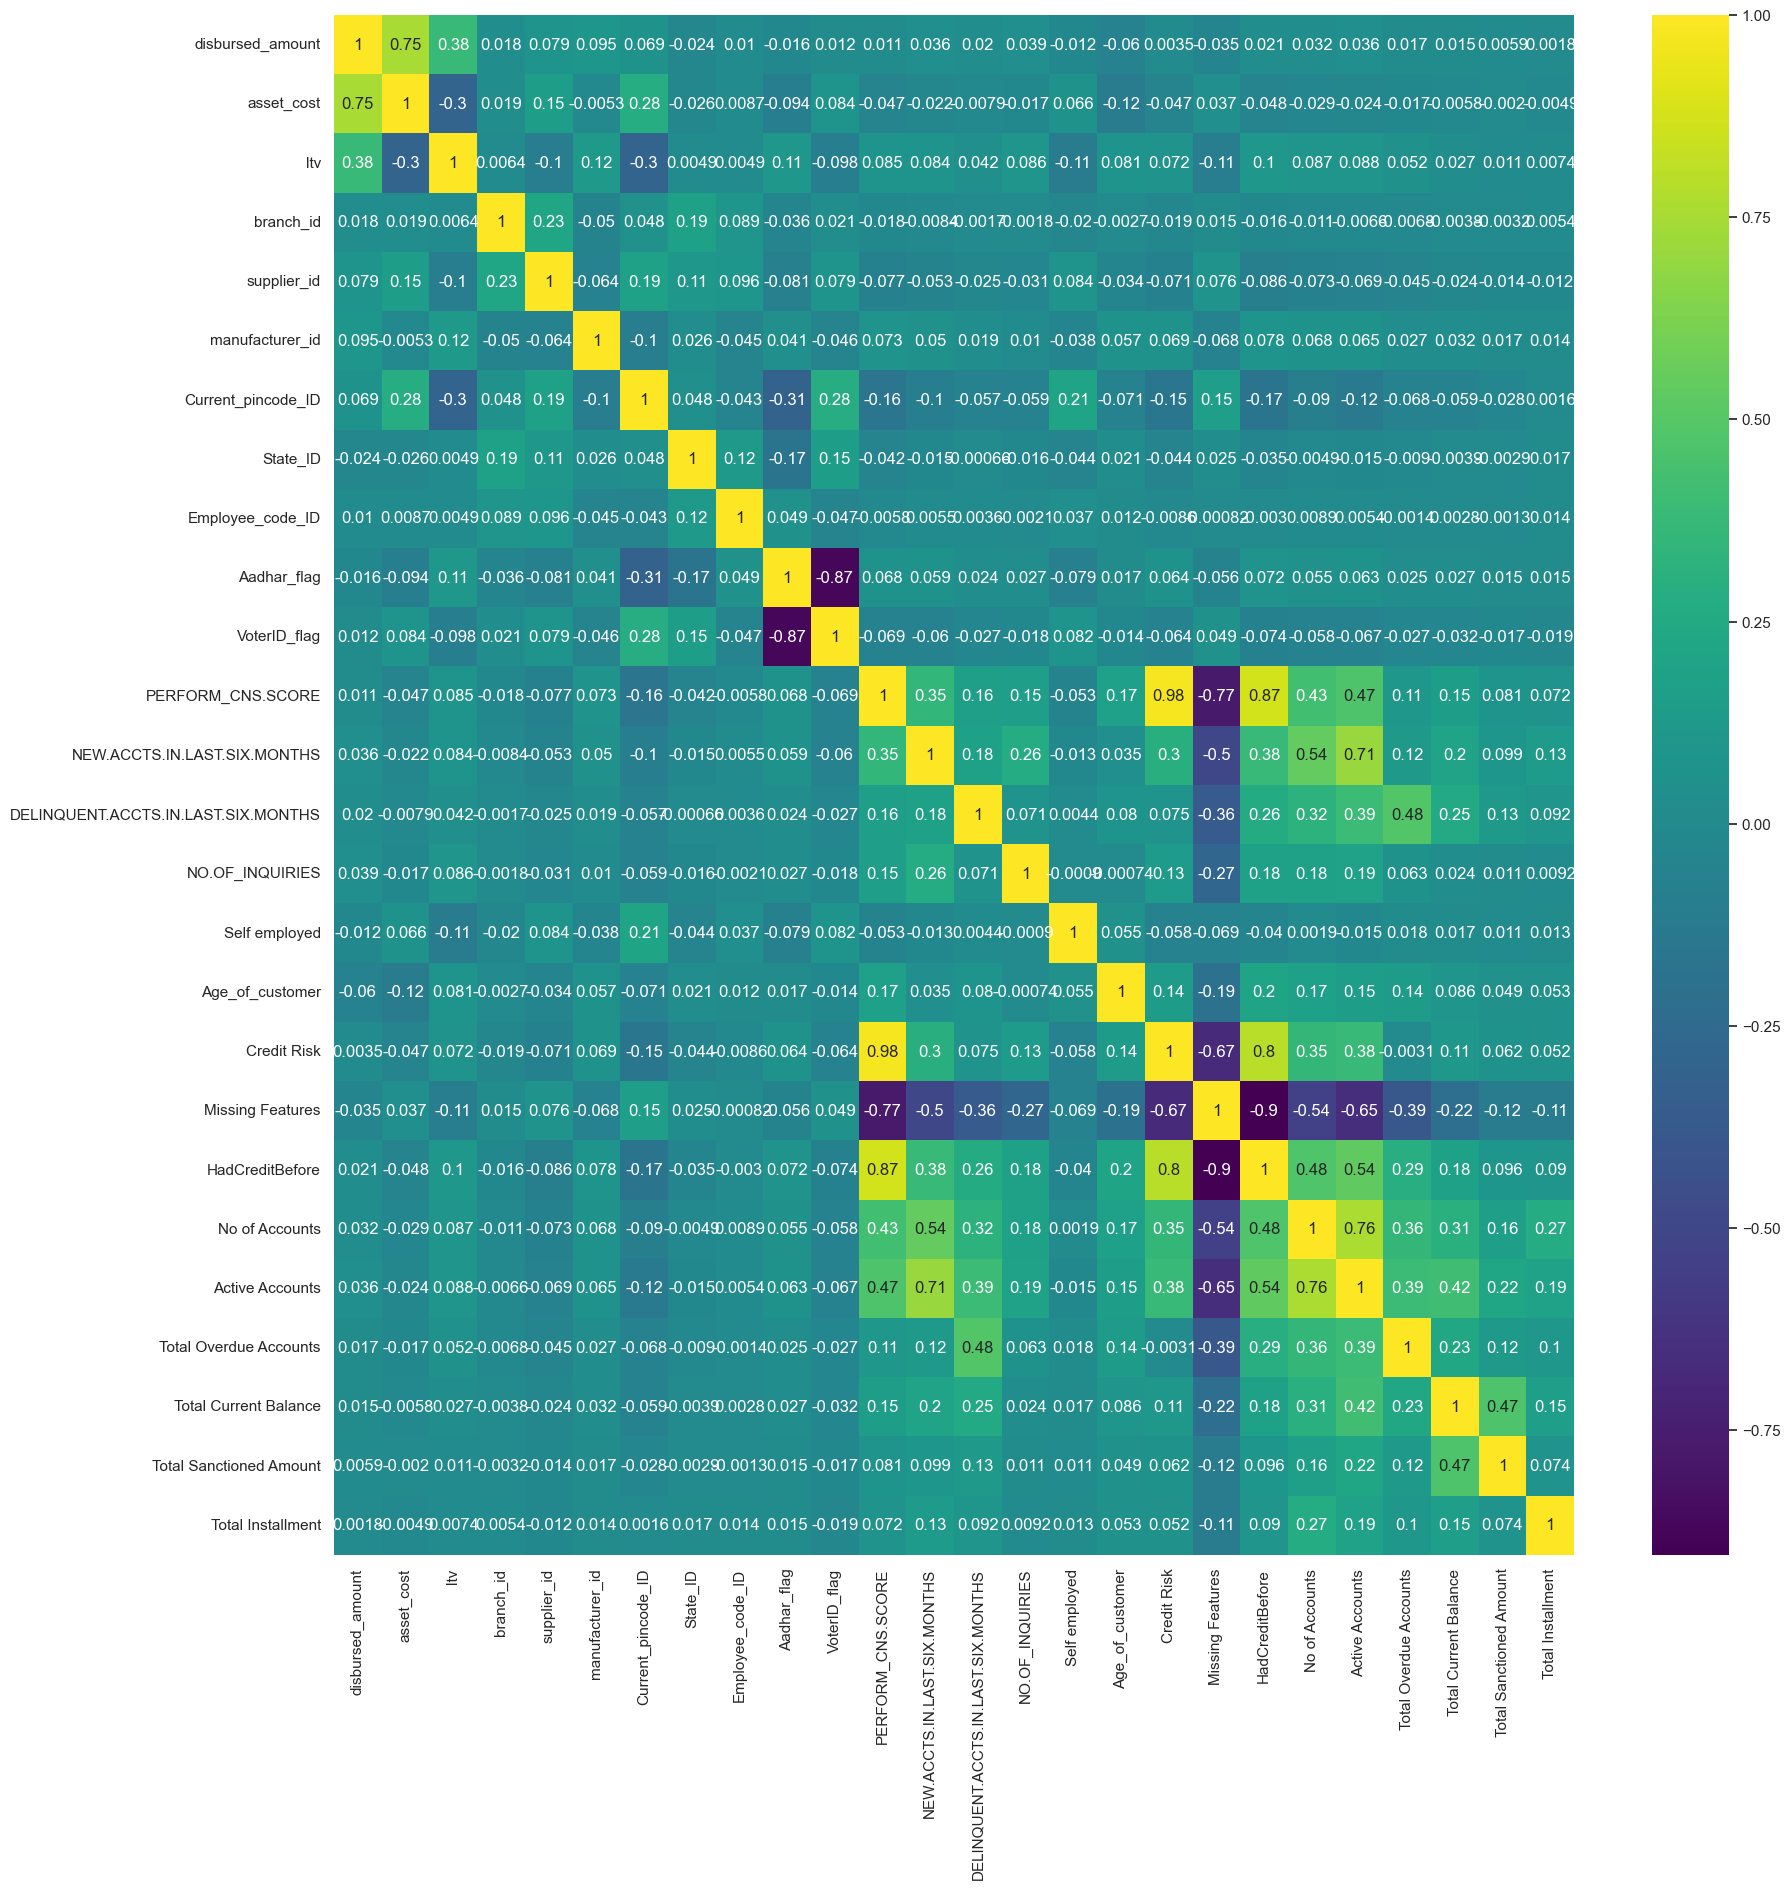

In [57]:
plt.rcParams["figure.figsize"]=(20,20)
hm=sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.show()

In [58]:
corr1 = ["disbursed_amount","asset_cost"]
corr2 = ["PERFORM_CNS.SCORE","Credit risk"]
corr3 = ["PERFORM_CNS.SCORE","HadCreditBefore"]
corr4 = ["PERFORM_CNS.SCORE","Missing Features"]
corr5 =["Missing Features","HadCreditBefore"]
corr6 =["Credit risk","HadCreditBefore"]
corr7 =["Aadhar_flag","VoterID_flag"]

corr10 = ["disbursed_amount","asset_cost","PERFORM_CNS.SCORE","Credit Risk","Missing Features","HadCreditBefore","Aadhar_flag","VoterID_flag"]

print(data[corr10].corr())

                   disbursed_amount  asset_cost  PERFORM_CNS.SCORE  \
disbursed_amount           1.000000    0.752668           0.011409   
asset_cost                 0.752668    1.000000          -0.047398   
PERFORM_CNS.SCORE          0.011409   -0.047398           1.000000   
Credit Risk                0.003499   -0.047119           0.975510   
Missing Features          -0.034779    0.037310          -0.771376   
HadCreditBefore            0.020631   -0.048003           0.869089   
Aadhar_flag               -0.015589   -0.093716           0.067832   
VoterID_flag               0.011665    0.083899          -0.069184   

                   Credit Risk  Missing Features  HadCreditBefore  \
disbursed_amount      0.003499         -0.034779         0.020631   
asset_cost           -0.047119          0.037310        -0.048003   
PERFORM_CNS.SCORE     0.975510         -0.771376         0.869089   
Credit Risk           1.000000         -0.674980         0.795635   
Missing Features     -0.

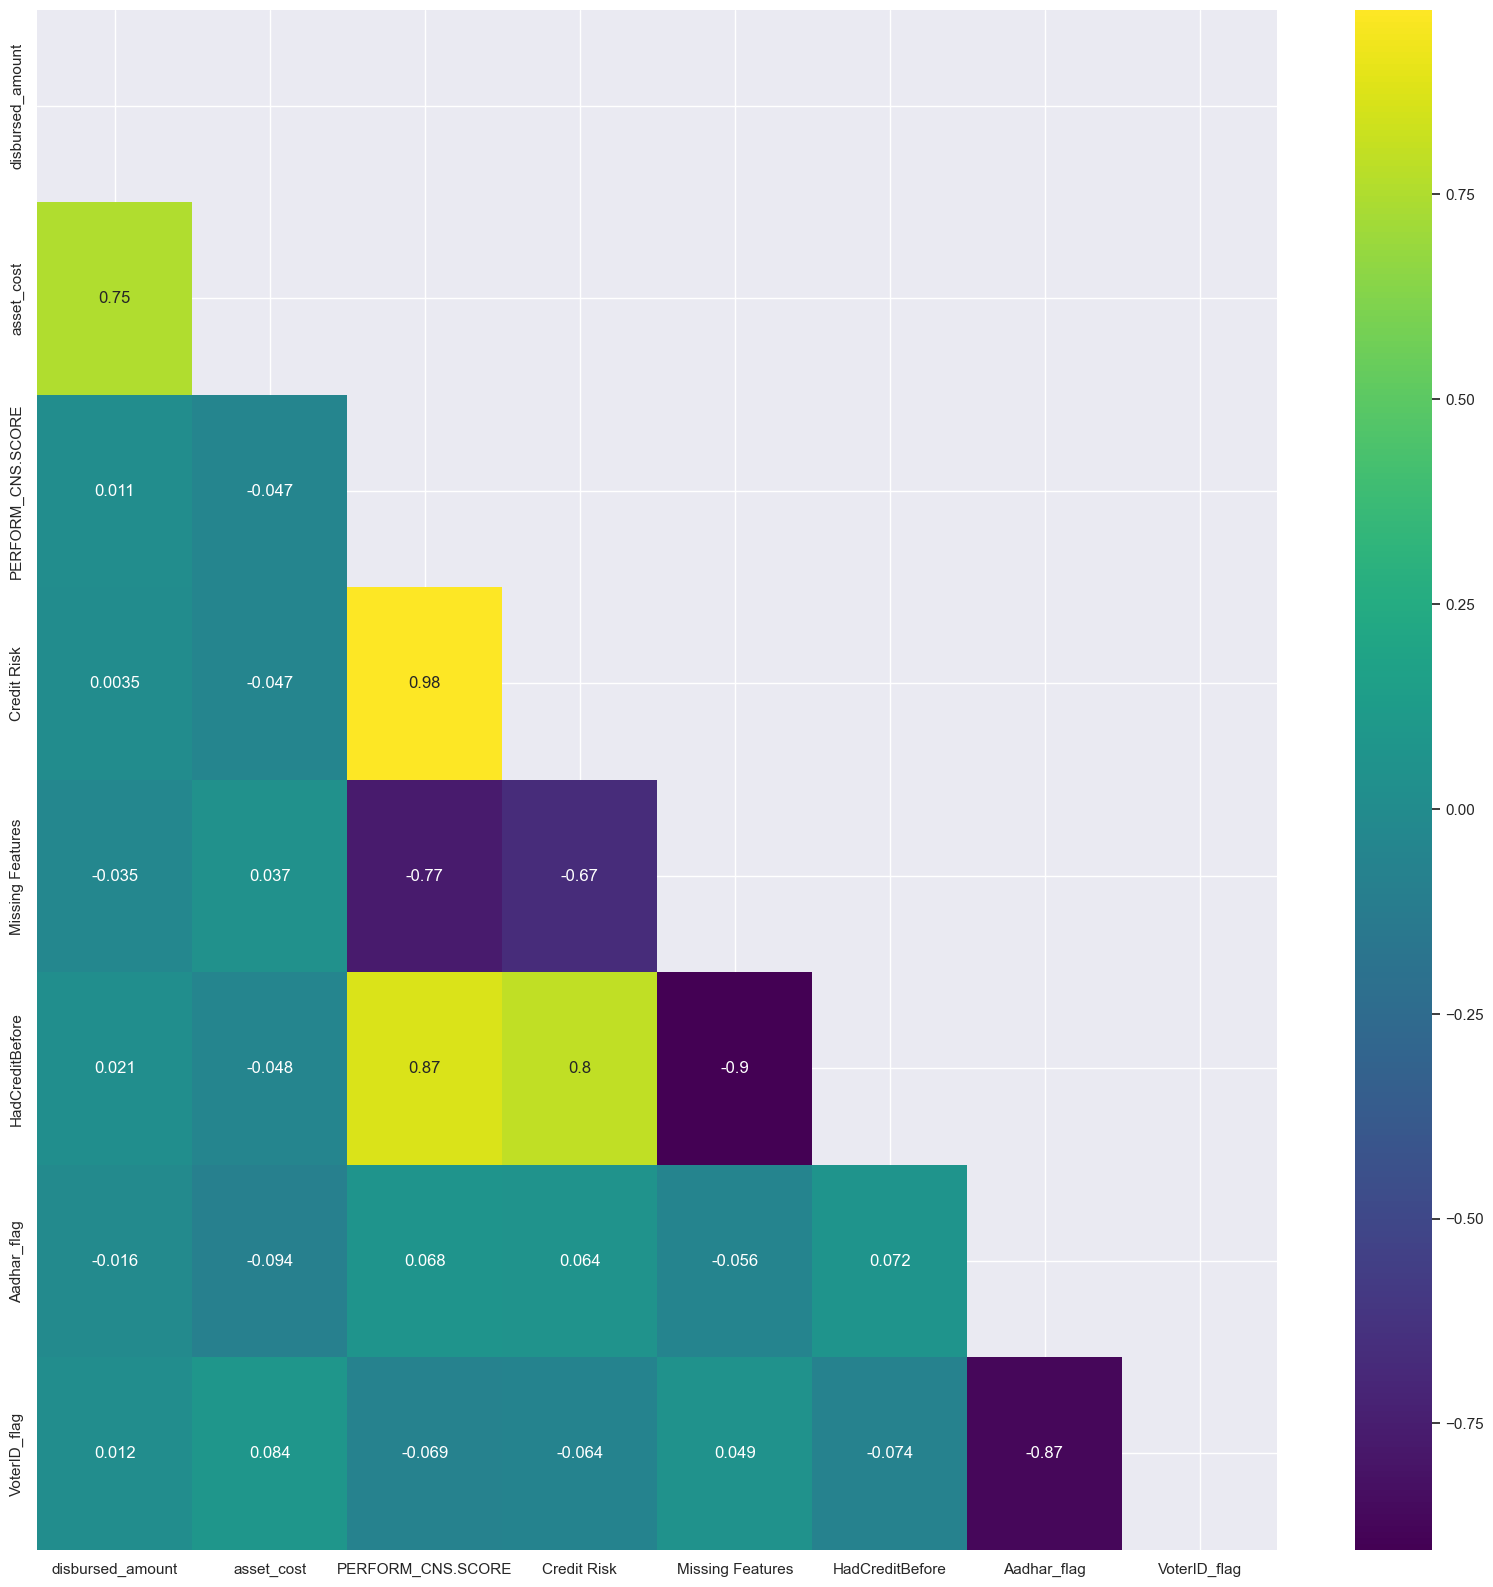

In [59]:
plt.rcParams["figure.figsize"]=(20,20)
hm=sns.heatmap(data[corr10].corr(),annot=True,mask=np.triu(data[corr10].corr()),cmap='viridis' )
plt.show()

Primećujemo značajne korelacije:

 * <b>disbursed_amount</b> i <b>asset_cost</b> 0.75 - jako pozitivna, izbacujemo <b>asset_cost</b> jer se u analizi prediktora pokazala kao lošija
 
 * <b>PERFORM_CNS.SCORE</b> i <b>Credit risk</b> 0.98 -jaka pozitivna
 
 * <b>PERFORM_CNS.SCORE</b> i <b>HadCreditBefore</b> 0.87 - jaka pozitivna
 
 * <b>PERFORM_CNS.SCORE</b> i <b>Missing Features</b> -0.77 - jaka negativna
 
 * <b>Missing Feature</b> i <b>HadCreditBefore</b> -0.9 - jaka negativna
 
 * <b>Credit risk</b> i <b>HadCreditBefore</b> 0.8 - izbacujemo HadCreditBefore, jer ima dve jake pozitivne korelacije, a pritom   je u analizi prediktora znacajno lošiji bio i od Missing Features i od Credit riska
 
 * <b>Aadhar_flag</b> i <b>VoterID_flag</b>  -0.87 - jaka negativna

In [60]:
data=data.drop('asset_cost',axis=1)
data=data.drop('PERFORM_CNS.SCORE',axis=1)
data=data.drop('HadCreditBefore',axis=1)

In [61]:
data=data.drop('No of Accounts',axis=1)
data

,disbursed_amount,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,Aadhar_flag,VoterID_flag,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Self employed,Age_of_customer,Credit Risk,Missing Features,loan_default,Active Accounts,Total Overdue Accounts,Total Current Balance,Total Sanctioned Amount,Total Installment
0,50578,89.55,67,22807,45,1441,6,1998,1,0,0,0,0,0,39,-1,26,0,0,0,0,0,0
1,47145,73.23,67,22807,45,1502,6,1998,1,0,0,1,0,1,38,5,13,1,1,1,27600,50200,1991
2,53278,89.63,67,22807,45,1497,6,1998,1,0,0,0,0,1,38,-1,25,0,0,0,0,0,0
3,57513,88.48,67,22807,45,1501,6,1998,1,0,0,0,1,1,30,2,18,1,0,0,0,0,31
4,52378,88.39,67,22807,45,1495,6,1998,1,0,0,0,1,1,46,-1,23,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,63213,60.72,34,20700,48,1050,6,3705,0,1,0,0,0,0,35,10,17,0,3,0,390443,416133,4084
233150,73651,74.95,34,23775,51,990,6,3705,0,1,0,0,0,1,35,13,20,0,0,0,0,0,1565
233151,33484,48.45,77,22186,86,2299,4,3479,1,0,0,0,0,0,47,-1,26,0,0,0,0,0,0
233152,34259,49.10,77,22186,86,2299,4,3479,1,0,0,0,0,0,29,-1,26,0,0,0,0,0,0


<h1>Analiza outliera</h1>

In [62]:
def find_outliers_IQR(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    iqr=q3-q1
    uw = data[data<=q3+1.5*iqr].max()
    lw = data[data>=q1-1.5*iqr].min()
    outliers = data[((data<lw) | (data>uw))]
    return (outliers,lw,uw)

In [63]:
for col in data.select_dtypes(exclude='object').columns:
    (outliers,lw,uw) = find_outliers_IQR(data[col])
    print(col)
    print("Broj outlier-a: "+ str(len(outliers)))
    print("Procentualni udeo outlier-a: "+str(round(100*len(outliers)/len(data[col]),2))+'%')
    print("Max vrednost outlier-a: "+ str(outliers.max()))
    print("Min vrednost outlier-a: "+ str(outliers.min()))
    print('*****************')

disbursed_amount
Broj outlier-a: 9868
Procentualni udeo outlier-a: 4.23%
Max vrednost outlier-a: 990572
Min vrednost outlier-a: 13320
*****************
ltv
Broj outlier-a: 6170
Procentualni udeo outlier-a: 2.65%
Max vrednost outlier-a: 46.69
Min vrednost outlier-a: 10.03
*****************
branch_id
Broj outlier-a: 0
Procentualni udeo outlier-a: 0.0%
Max vrednost outlier-a: nan
Min vrednost outlier-a: nan
*****************
supplier_id
Broj outlier-a: 0
Procentualni udeo outlier-a: 0.0%
Max vrednost outlier-a: nan
Min vrednost outlier-a: nan
*****************
manufacturer_id
Broj outlier-a: 797
Procentualni udeo outlier-a: 0.34%
Max vrednost outlier-a: 156
Min vrednost outlier-a: 145
*****************
Current_pincode_ID
Broj outlier-a: 0
Procentualni udeo outlier-a: 0.0%
Max vrednost outlier-a: nan
Min vrednost outlier-a: nan
*****************
State_ID
Broj outlier-a: 417
Procentualni udeo outlier-a: 0.18%
Max vrednost outlier-a: 22
Min vrednost outlier-a: 20
*****************
Employee_c

In [64]:
pom = []
for col in data.select_dtypes(exclude='object').columns:
    (outliers,lw,uw) = find_outliers_IQR(data[col])
    if len(outliers) > 0:
        pom = pom + [col]
print("Ima outlier-a: ")
print(pom)
print()
print("Nema outlier-a:")
print(data.select_dtypes(exclude='object').columns.difference(pom))

Ima outlier-a: 
['disbursed_amount', 'ltv', 'manufacturer_id', 'State_ID', 'Aadhar_flag', 'VoterID_flag', 'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES', 'Age_of_customer', 'Active Accounts', 'Total Overdue Accounts', 'Total Current Balance', 'Total Sanctioned Amount', 'Total Installment']

Nema outlier-a:
Index(['Credit Risk', 'Current_pincode_ID', 'Employee_code_ID',
       'Missing Features', 'Self employed', 'branch_id', 'supplier_id'],
      dtype='object')


U slučaju pokretanja modela koji su osetljivi na ekstremne vrednosti, treba obratiti pažnju na outlier-e.

<h1>Performanse baznih klasifikacionih algoritama nakon bazične pripreme podataka i nakon feature selection - komparacija</h1>

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_curve)

In [66]:
X=data.drop('loan_default',axis=1)
y=data['loan_default']
y=y.astype('int')
model_dr=DecisionTreeClassifier(max_depth=3)
model_nb=GaussianNB()
model_lr = LogisticRegression(solver='liblinear',C=0.1)
model_kn = KNeighborsClassifier()

In [67]:
#acc = cross_val_score(model_kn, X, y, cv=10, scoring='accuracy').mean()
#print(f'Tačnost modela nakon osnovne prpreme podataka  je {acc*100:.1f}%')


#Iziskuje previse vremena da se izvrši

In [68]:
X_new=X.copy()
X_new

,disbursed_amount,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,Aadhar_flag,VoterID_flag,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Self employed,Age_of_customer,Credit Risk,Missing Features,Active Accounts,Total Overdue Accounts,Total Current Balance,Total Sanctioned Amount,Total Installment
0,50578,89.55,67,22807,45,1441,6,1998,1,0,0,0,0,0,39,-1,26,0,0,0,0,0
1,47145,73.23,67,22807,45,1502,6,1998,1,0,0,1,0,1,38,5,13,1,1,27600,50200,1991
2,53278,89.63,67,22807,45,1497,6,1998,1,0,0,0,0,1,38,-1,25,0,0,0,0,0
3,57513,88.48,67,22807,45,1501,6,1998,1,0,0,0,1,1,30,2,18,0,0,0,0,31
4,52378,88.39,67,22807,45,1495,6,1998,1,0,0,0,1,1,46,-1,23,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,63213,60.72,34,20700,48,1050,6,3705,0,1,0,0,0,0,35,10,17,3,0,390443,416133,4084
233150,73651,74.95,34,23775,51,990,6,3705,0,1,0,0,0,1,35,13,20,0,0,0,0,1565
233151,33484,48.45,77,22186,86,2299,4,3479,1,0,0,0,0,0,47,-1,26,0,0,0,0,0
233152,34259,49.10,77,22186,86,2299,4,3479,1,0,0,0,0,0,29,-1,26,0,0,0,0,0


Normalizacija raspodele vrednosti atributa. Pokušali smo prvo da normalizujemo raspodele vrednosti svih atributa, ali nam je to rezultiralo gorim performansama. Najbolji krajnje performanse nam je dala selekcija 20 najznačanijih atributa. Normalizacija bi nam bila neophodni korak pre primene knn-a ali smo odlučili da ovaj algoritam ne razradimo dodadno zbog prevelikog broja opservacija i atributa i malih brzina.

In [69]:
#from sklearn.preprocessing import power_transform
#power_transform(X_new, method='yeo-johnson') 
#X_power = pd.DataFrame(power_transform(X_new, method='yeo-johnson'), columns=X_new.columns, index=X_new.index)
#X_power.fillna(0, inplace = True)
#X_power

Feature selection

In [70]:
from sklearn.feature_selection import VarianceThreshold 
selection = VarianceThreshold(0.05)
selection.fit(X_new)
X_reduced = X_new.loc[:,selection.get_support()] #sve redove i one kolone koje su true
X_reduced.head()

,disbursed_amount,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,Aadhar_flag,VoterID_flag,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Self employed,Age_of_customer,Credit Risk,Missing Features,Active Accounts,Total Overdue Accounts,Total Current Balance,Total Sanctioned Amount,Total Installment
0,50578,89.55,67,22807,45,1441,6,1998,1,0,0,0,0,0,39,-1,26,0,0,0,0,0
1,47145,73.23,67,22807,45,1502,6,1998,1,0,0,1,0,1,38,5,13,1,1,27600,50200,1991
2,53278,89.63,67,22807,45,1497,6,1998,1,0,0,0,0,1,38,-1,25,0,0,0,0,0
3,57513,88.48,67,22807,45,1501,6,1998,1,0,0,0,1,1,30,2,18,0,0,0,0,31
4,52378,88.39,67,22807,45,1495,6,1998,1,0,0,0,1,1,46,-1,23,0,0,0,0,0


In [71]:
X_reduced.shape

(233154, 22)

Na ovaj na način smo izvršili selekciju atributa na način da smo zadali prag (threshold) varijanse na 0.05, pri čemu svi atributi čija varijansa ne prelazi datu granicu neće vidi validni za dalju analizu i stoga će biti izostvaljeni iz skupa podataka.

In [72]:
from sklearn.feature_selection import SelectKBest
selection = SelectKBest(k=20, score_func=f_classif)
selection.fit(X_reduced,y)
selection.get_support() 
X_reduced = X_reduced.loc[:,selection.get_support()]
X_reduced.head()

,disbursed_amount,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,Aadhar_flag,VoterID_flag,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Self employed,Age_of_customer,Credit Risk,Missing Features,Active Accounts,Total Overdue Accounts,Total Current Balance
0,50578,89.55,67,22807,45,1441,6,1998,1,0,0,0,0,0,39,-1,26,0,0,0
1,47145,73.23,67,22807,45,1502,6,1998,1,0,0,1,0,1,38,5,13,1,1,27600
2,53278,89.63,67,22807,45,1497,6,1998,1,0,0,0,0,1,38,-1,25,0,0,0
3,57513,88.48,67,22807,45,1501,6,1998,1,0,0,0,1,1,30,2,18,0,0,0
4,52378,88.39,67,22807,45,1495,6,1998,1,0,0,0,1,1,46,-1,23,0,0,0


In [73]:
X_reduced.shape

(233154, 20)

In [74]:
print(cross_val_score(model_nb, X, y, cv=10, scoring='accuracy').mean())
print(cross_val_score(model_nb, X_reduced, y, cv=10, scoring='accuracy').mean())

0.781642165760194
0.7828774106277975


In [75]:
print(cross_val_score(model_nb, X, y, cv=10, scoring='roc_auc').mean())
print(cross_val_score(model_nb, X_reduced, y, cv=10, scoring='roc_auc').mean())

0.5687592206808241
0.5776622578682757


Nije se mnogo povećao accuracy ali smo uspeli da poboljšamo roc_auc

In [76]:
print(cross_val_score(model_dr, X, y, cv=10, scoring='roc_auc').mean())
print(cross_val_score(model_dr, X_reduced, y, cv=10, scoring='roc_auc').mean())

0.8681372010205131
0.8681372010205131


In [77]:
print(cross_val_score(model_dr, X_reduced, y, cv=10, scoring='accuracy').mean())

0.851437250693297


In [78]:
print(cross_val_score(model_lr, X, y, cv=10, scoring='roc_auc').mean())
print(cross_val_score(model_lr, X_reduced, y, cv=10, scoring='roc_auc').mean())

0.49886270736248217
0.5214327420205279


In [79]:
print(cross_val_score(model_lr, X, y, cv=10, scoring='accuracy').mean())
print(cross_val_score(model_lr, X_reduced, y, cv=10, scoring='accuracy').mean())

0.7829245907388376
0.7829074344017156


Probaćemo preko Wrapper feature selector-a da poboljšamo performanse nb modela

In [80]:
from sklearn.feature_selection import SequentialFeatureSelector
model_wrapper = SequentialFeatureSelector(model_nb, n_features_to_select=18, direction='forward', scoring='roc_auc', cv=5)
model_wrapper.fit(X,y)
model_wrapper.get_support()
X_reducedNB = X.loc[:, model_wrapper.get_support()]
cross_val_score(model_nb, X_reducedNB, y, cv=10, scoring='roc_auc').mean()

0.585825839579676

Zaključak: Performanse se jesu poboljšale ali ne značajno, što nam govori da svi atributi koji postoje nose neku informaciju i da smo jako dobro odradili osnovnu pripremu podataka. Za NB na dalje radimo sa X_reducedNB, DT radimo sa X i LR radimo sa X_reduced.

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

xtr, xtest, ytr, ytest = train_test_split(X_reduced, y, test_size=0.25, random_state=18)

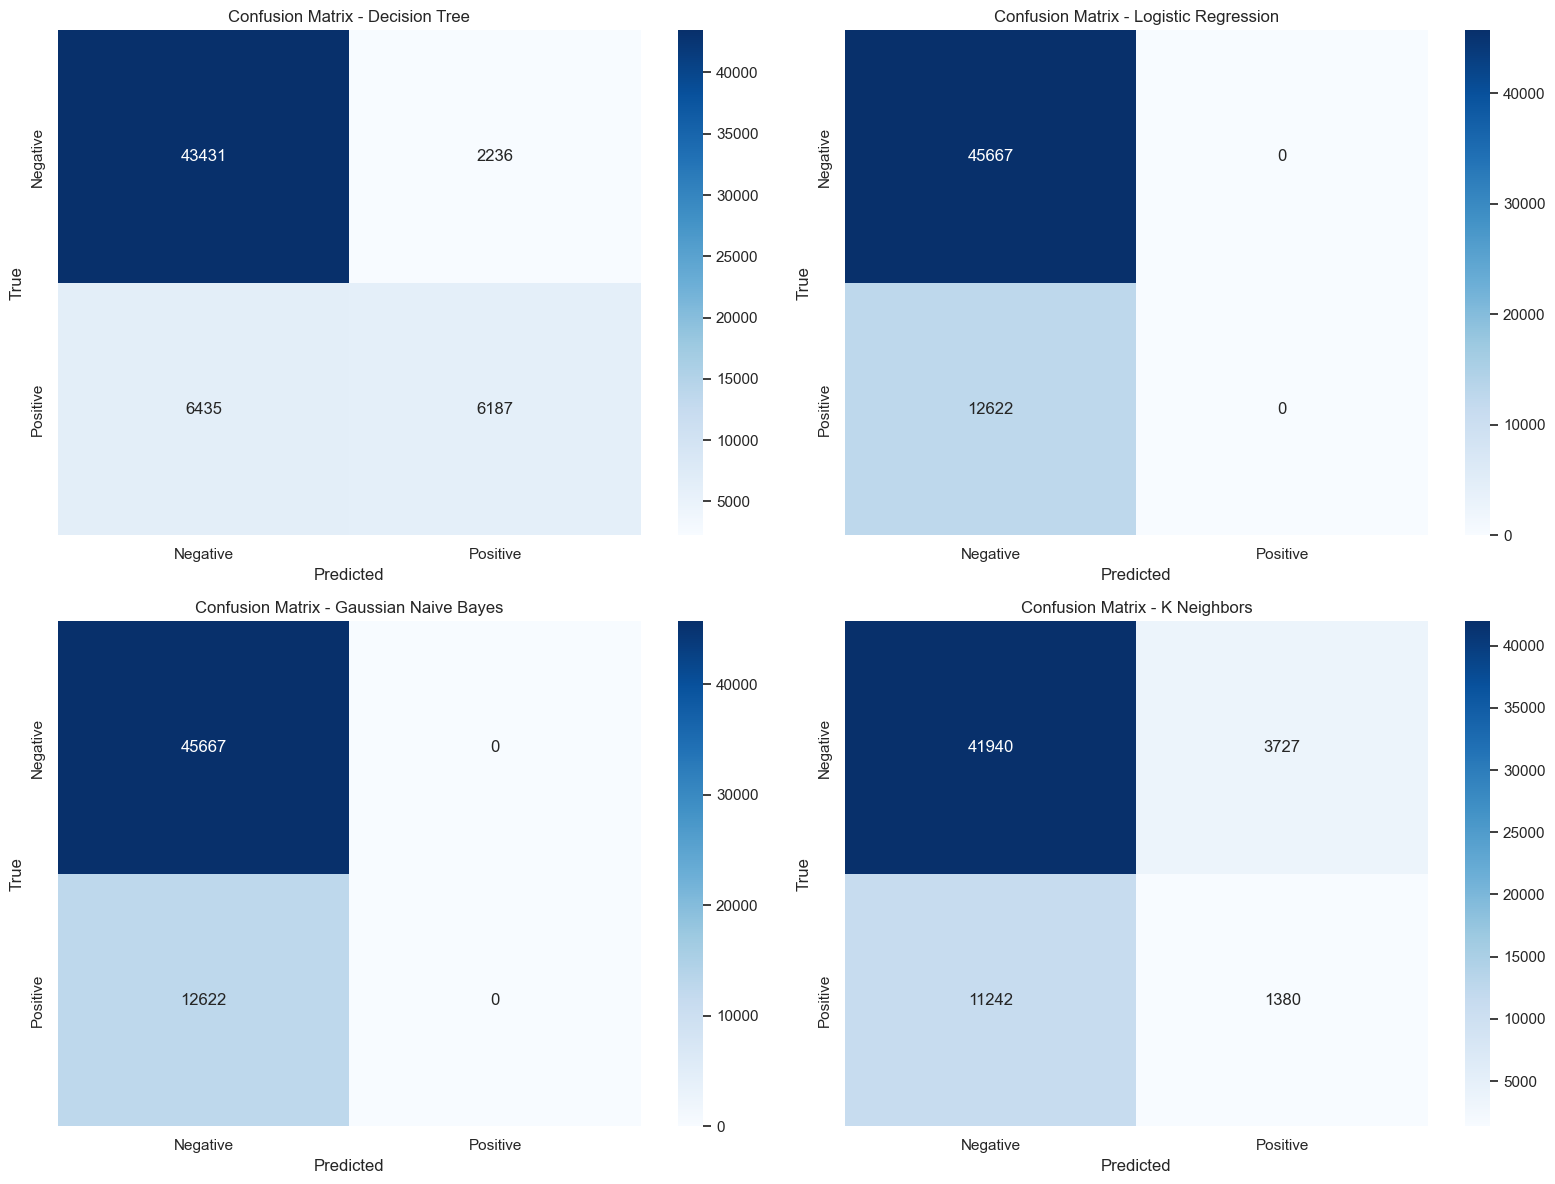

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


model_dr=DecisionTreeClassifier(max_depth=3)
model_nb=GaussianNB()
model_lr = LogisticRegression(solver='liblinear',C=0.1)
model_kn = KNeighborsClassifier()

model_dr.fit(xtr,ytr)
model_nb.fit(xtr,ytr)
model_lr.fit(xtr,ytr)
model_kn.fit(xtr,ytr)

# Predicted labels for each model
y_pred_dr = model_dr.predict(xtest)
y_pred_lr = model_lr.predict(xtest)
y_pred_nb = model_nb.predict(xtest)
y_pred_kn = model_kn.predict(xtest)

# Calculate confusion matrices for each model
conf_matrix_dr = confusion_matrix(ytest, y_pred = y_pred_dr)
conf_matrix_lr = confusion_matrix(ytest, y_pred = y_pred_lr)
conf_matrix_nb = confusion_matrix(ytest, y_pred = y_pred_nb)
conf_matrix_kn = confusion_matrix(ytest, y_pred = y_pred_kn)

# Create heatmaps for each confusion matrix
models = ["Decision Tree", "Logistic Regression", "Gaussian Naive Bayes", "K Neighbors"]
conf_matrices = [conf_matrix_dr, conf_matrix_lr, conf_matrix_nb, conf_matrix_kn]

plt.figure(figsize=(16, 12))
for i, conf_matrix in enumerate(conf_matrices):
    plt.subplot(2, 2, i + 1)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - {models[i]}")

plt.tight_layout()
plt.show()


In [85]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
def print_performance(y, y_hat):
    
    print(f'Accuracy: {accuracy_score(y, y_hat)}')
    print(f'Precision: {precision_score(y, y_hat)}')
    print(f'Recall: {recall_score(y, y_hat)}')
    print(f'F1: {f1_score(y, y_hat)}')
    print(f'ROC AUC: {roc_auc_score(y, y_hat)}')
    print("\n")


In [87]:
print("Decision Tree")
print_performance(ytest,y_pred_dr)
print("Naive Bayes")
print_performance(ytest,y_pred_nb)
print("Logistic Regression")
print_performance(ytest,y_pred_lr)
print("KNeighboursClassifier")
print_performance(ytest,y_pred_dr)

Decision Tree
Accuracy: 0.8512412290483625
Precision: 0.7345363884601686
Recall: 0.4901758833782285
F1: 0.5879781420765028
ROC AUC: 0.7206063685619108


Naive Bayes
Accuracy: 0.7834582854397913
Precision: 0.0
Recall: 0.0
F1: 0.0
ROC AUC: 0.5


Logistic Regression
Accuracy: 0.7834582854397913
Precision: 0.0
Recall: 0.0
F1: 0.0
ROC AUC: 0.5


KNeighboursClassifier
Accuracy: 0.8512412290483625
Precision: 0.7345363884601686
Recall: 0.4901758833782285
F1: 0.5879781420765028
ROC AUC: 0.7206063685619108




<h1>Optimizacija hiperparametara</h1>

Logistička regresija

In [88]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats
params = {"penalty": ['l1', 'l2'], 
         
          "C": scipy.stats.uniform(0.01,1)}  # uniformna raspodela, u tom intervalu uzmi neku slucajnu vrednost sa uniformnom verovatnocom da bas tu vrednost izaberes

n_iter_search = 10
random_search = RandomizedSearchCV(LogisticRegression(solver='liblinear'), param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='accuracy')
random_search.fit(X_reduced,y)

print('Best param: ',random_search.best_params_)

Best param:  {'C': 0.11534419098649694, 'penalty': 'l2'}


In [89]:
lr1 = LogisticRegression(C=0.39348125787781185, penalty='l2', solver='liblinear')
print(cross_val_score(lr1, X_reduced,y, cv=10, scoring='roc_auc').mean())
print(cross_val_score(lr1, X_reduced,y, cv=10, scoring='accuracy').mean())

0.5272957337573114
0.7829074344017155


Zaključak: Korišćenjem neiscrpne pretrage, čiji je cilj da se pronađu optimalne vrednosti hiperparametara, ali tako da se ne pokušaju sve kombinacije već samo pojedine dobili smo da će naš model najbolje performanse postići ako su hiperparametri C: 0.39348125787781185 i penalty: l2. Kad uporedimo perforamanse sa početnim modelom vidimo da se one jesu malo poboljšale, roc_auc sa 0.5 na 0.52.

Decision tree

In [90]:
from sklearn.model_selection import GridSearchCV
tree = DecisionTreeClassifier()
parameters = {'max_features': [15, 16, 17], 'min_samples_leaf': [20, 23, 25, 26],'max_depth': [27,29,31]} 
grid = GridSearchCV(tree, parameters, cv=5, scoring='accuracy') 
grid.fit(X,y)
print('Best param: ', grid.best_params_) 

Best param:  {'max_depth': 29, 'max_features': 17, 'min_samples_leaf': 26}


In [91]:
tree1 = DecisionTreeClassifier(max_features=17, min_samples_leaf=26, max_depth=29)
print(cross_val_score(tree1, X,y, cv=10, scoring='accuracy').mean())

0.9144814667078872


In [92]:
print(cross_val_score(tree1, X,y, cv=10, scoring='roc_auc').mean())

0.9631621884180654


Zaključak: Korišćenjem GRID pretrage koja isprobava sve kominbacije hiperparametara koje smo zadali, dobili smo da će naš model najbolje performanse postići ukoliko su hiperparametri max_depth: 29, max_features: 17, min_samples_leaf: 26}. Kada uporedimo performanse optimizovanog modela sa početnim vidimo da se roc_auc poboljšala sa 0.87 na 0.96 i accuracy sa 0.85 na 0.92.

<h1>Ansambl algoritmi</h1>

<b>VotingClassifier</b> - kombinovanje glasova eksperata (<i>voting</i>)

In [93]:
from sklearn.ensemble import VotingClassifier
model_voting = VotingClassifier(voting='soft', estimators=[('naive_bayes', model_nb),('decision_tree', tree1),('logistic_regression', lr1)])
for model in [model_nb,tree1,lr1,model_lr,model_voting]:
    result = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
    print(f'Model {model.__class__.__name__} Accuracy is {result:.3f}')


Model GaussianNB Accuracy is 0.782
Model DecisionTreeClassifier Accuracy is 0.912
Model LogisticRegression Accuracy is 0.783
Model LogisticRegression Accuracy is 0.783
Model VotingClassifier Accuracy is 0.791


In [94]:
for model in [model_nb,tree1,lr1,model_lr,model_voting]:
    result = cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean()
    print(f'Model {model.__class__.__name__} ROC_AUC is {result:.3f}')

Model GaussianNB ROC_AUC is 0.569
Model DecisionTreeClassifier ROC_AUC is 0.961
Model LogisticRegression ROC_AUC is 0.507
Model LogisticRegression ROC_AUC is 0.499
Model VotingClassifier ROC_AUC is 0.958


Zaključak: Performanse grupnog algoritma se uprosečuju. Bolji je od najgoreg pojedinca iz grupe ali gori od najboljeg

<b>Bagging</b>

In [95]:
from sklearn.ensemble import BaggingClassifier
#tree1 = DecisionTreeClassifier(max_features=17, min_samples_leaf=26, max_depth=29)

model_bagging = BaggingClassifier(base_estimator=tree1, bootstrap=5)
model_bagging.fit(X,y)
predictionBagging = model_bagging.predict(X)
print(cross_val_score(model_bagging, X, y, cv=10, scoring='roc_auc').mean())
print(cross_val_score(model_bagging, X, y, cv=10, scoring='accuracy').mean())

0.9735406985657835
0.924998107843502


Zaključak: Napravili smo bagging ansambl za 5 istih modela tree1, razlika je u tome što svaki model uči na drugačijem podskupu podataka, pri čemu su modeli specijalizovani za određene podskupove - svaki će malo drugačije glasati jer ima različito iskustvo, to jest podatke na kojima se uči. Zahvaljujući tome smo uspeli da i već prethodno odlične performanse postanu još bolje. Sad ćemo videti da li na ovaj način možemo poboljšati rad algoritma koji nije imao tako dobre performanse.

In [96]:
from sklearn.ensemble import BaggingClassifier

model_bagging2 = BaggingClassifier(base_estimator=model_nb, bootstrap=5)
model_bagging2.fit(X_reducedNB,y)
predictionBagging = model_bagging2.predict(X_reducedNB)
print(cross_val_score(model_bagging2, X_reducedNB, y, cv=10, scoring='roc_auc').mean())
print(cross_val_score(model_bagging2, X_reducedNB, y, cv=10, scoring='accuracy').mean())

0.58557210392134
0.7829288796391636


In [97]:
from sklearn.ensemble import BaggingClassifier

model_bagging2 = BaggingClassifier(base_estimator=model_nb, bootstrap=100, n_jobs=3)
model_bagging2.fit(X_reducedNB,y)
predictionBagging = model_bagging2.predict(X_reducedNB)
print(cross_val_score(model_bagging2, X_reducedNB, y, cv=10, scoring='roc_auc').mean())
print(cross_val_score(model_bagging2, X_reducedNB, y, cv=10, scoring='accuracy').mean())

0.5860076988674843
0.7829288796391636


<b>Random Forest</b>

In [98]:
model_dr=DecisionTreeClassifier()
scores = cross_val_score(model, X, y, cv = 10, scoring='roc_auc')
scores.mean()

0.957486262641597

In [99]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X,y)
forest_predict = forest.predict(X)
cross_val_score(forest, X, y, cv = 10, scoring='roc_auc').mean()

0.9560035242836896

Zaključak: U odnosu na stablo odlučivanja sa dubinom 3, čiji roc_auc je iznosio 0.8681372010205131, Random Forest je dao bolje rezultate. U odnosu na stablo kom nismo podešavali hipeparametre, Random Forest je dao za nijansu bolje rezultate. Što se tiče stabla sa podešenim optimalnim hiperparametrima, čiji roc_auc iznosi 0.9589150083239909, možemo da zapazimo da je Random Forest dao nešto lošije rezultate. Međutim, možemo da povećamo broj stabala koji čine šumu, budući da je pretreniranje kao takvo retko jer povećanjem broja modela mi zapravo umnožovamo podatke. 

In [100]:
forest = RandomForestClassifier(n_estimators=200)
forest.fit(X,y)
forest_predict = forest.predict(X)
cross_val_score(forest, X, y, cv = 10, scoring='roc_auc').mean()

0.9569043081344211

Vidimo da su performanse bolje kako povećavamo broj stabala koje čine šumu, međutim još ne dosežu nivo stabla sa postavljenim optimalnim hiperarametrima. 

In [101]:
forest.feature_importances_ #dobijamo koliko prema mišljenju cele šume određeni atribut igra značajnu ulogu u donošenju krajnjeg zaključka

array([0.05715405, 0.06066819, 0.03148733, 0.04706952, 0.01648357,
       0.06123642, 0.02306112, 0.04995941, 0.00571203, 0.0074734 ,
       0.01581755, 0.00816732, 0.03791545, 0.07497729, 0.04488985,
       0.03911944, 0.28284203, 0.02292289, 0.00846561, 0.03392945,
       0.0357842 , 0.03486389])

<Axes: ylabel='att'>

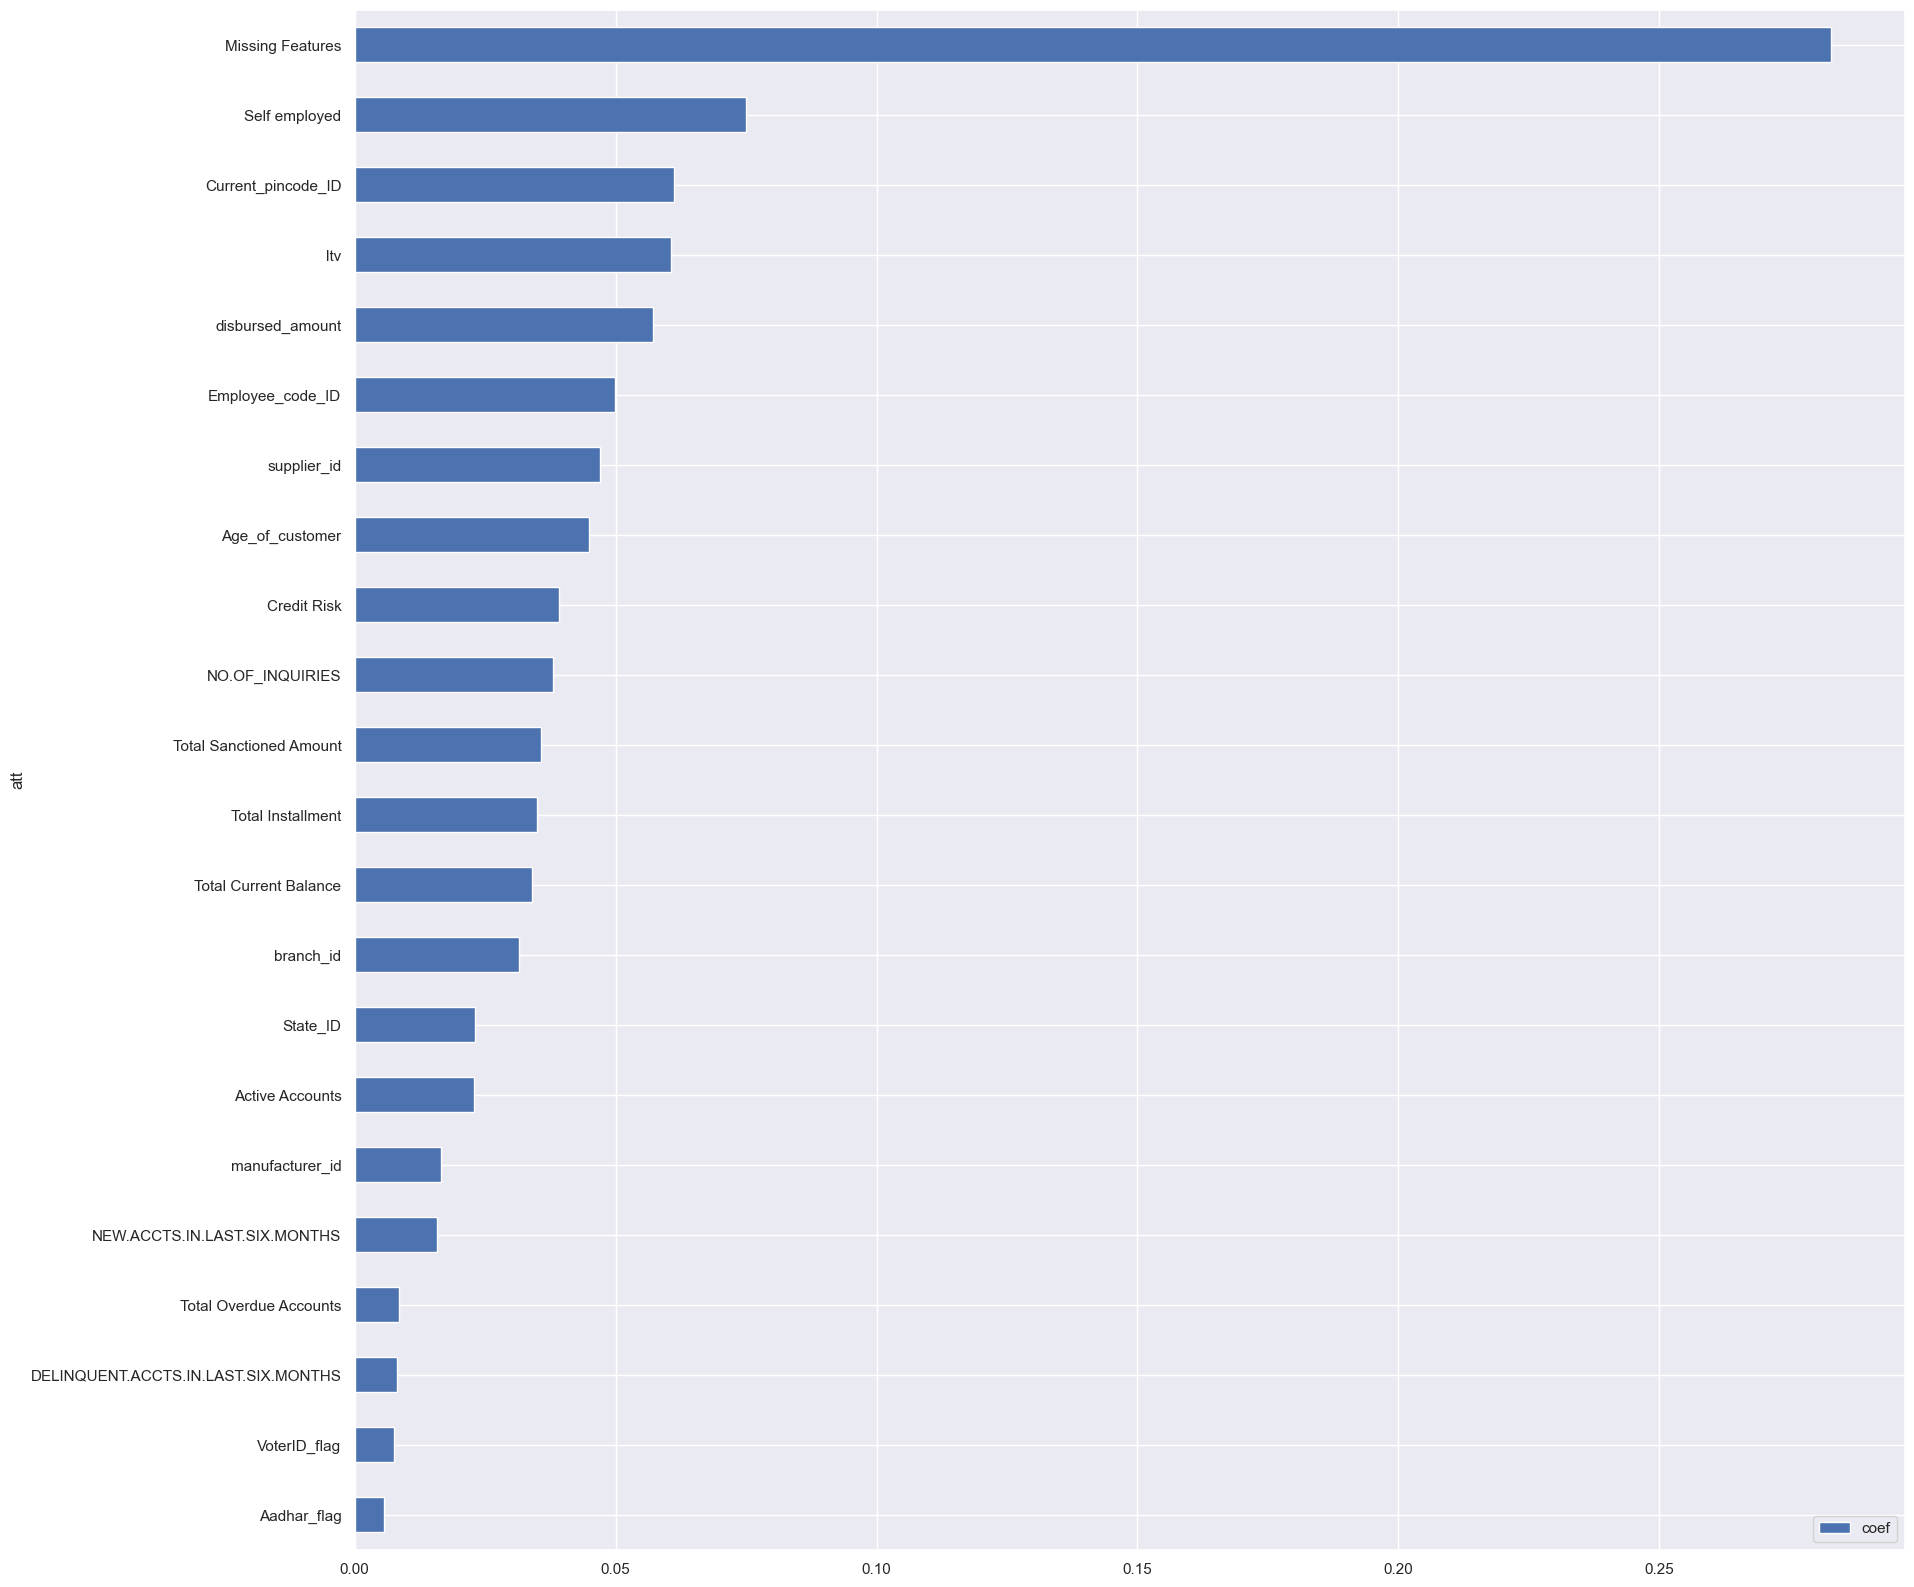

In [102]:
coefs = pd.DataFrame({'att':X.columns, 'coef':forest.feature_importances_}).sort_values(by='coef',ascending=True).replace(0,np.nan).dropna()
coefs.plot.barh(x='att',y='coef',figsize=(20, 20)) 

Vidimo da <b> Missing features </b> igra najznačajniju ulogu kada su u pitanju atributi koje doprinose tačnosti algoritma

<b>Ada Boost</b>

In [103]:
#lr1 = LogisticRegression(C=0.39348125787781185, penalty='l2', solver='liblinear') roc_auc - 0.5242318100064769
# accuracy - 0.7829117234859961
from sklearn.ensemble import AdaBoostClassifier
model_boost = AdaBoostClassifier(base_estimator=lr1, n_estimators=20, learning_rate=0.5)
model_boost.fit(X_reduced,y)
print(cross_val_score(model_boost, X_reduced, y, cv = 10, scoring='roc_auc').mean())
print(cross_val_score(model_boost, X_reduced, y, cv = 10, scoring='accuracy').mean())

0.6855273745755456
0.7812175480720146


Zaključak: U pogledu roc_auc imamo bolje rezultate primenom Ada Boost-a, međutim kod accuracy imamo za nijansu lošije rezultate. Upoređivali smo sa modelom kod koga su podešeni optimalni hiperparametri. 

In [104]:
model_boost2 = AdaBoostClassifier(base_estimator=model_nb, n_estimators=20, learning_rate=0.5)
model_boost2.fit(X_reducedNB,y)
print(cross_val_score(model_boost2, X_reducedNB, y, cv = 5, scoring='roc_auc').mean())
print(cross_val_score(model_boost2, X_reducedNB, y, cv = 5, scoring='accuracy').mean())

0.553076469862736
0.7354452986930167


Accuracy kod modela nb je iznosio 0.7828774106277975, a roc_auc 0.5776622578682757, tako da ne možemo primetiti poboljšanja u peformansama kada je u pitanju upotreba Ada Boost-a pri čemu modeli koji u njemu učestvuju predstavljaju Naivnog Bajesa. 

<b>Gradient boosting</b>

In [105]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100)

scores = cross_val_score(model, X, y, cv = 10, scoring='roc_auc')
scores.mean()

0.9416913156052764

Vidimo da su rezultati odlični, međutim bolje rezultate smo postigli sa Random Forest.

In [106]:
model.fit(X, y)

GradientBoostingClassifier()

<Axes: ylabel='att'>

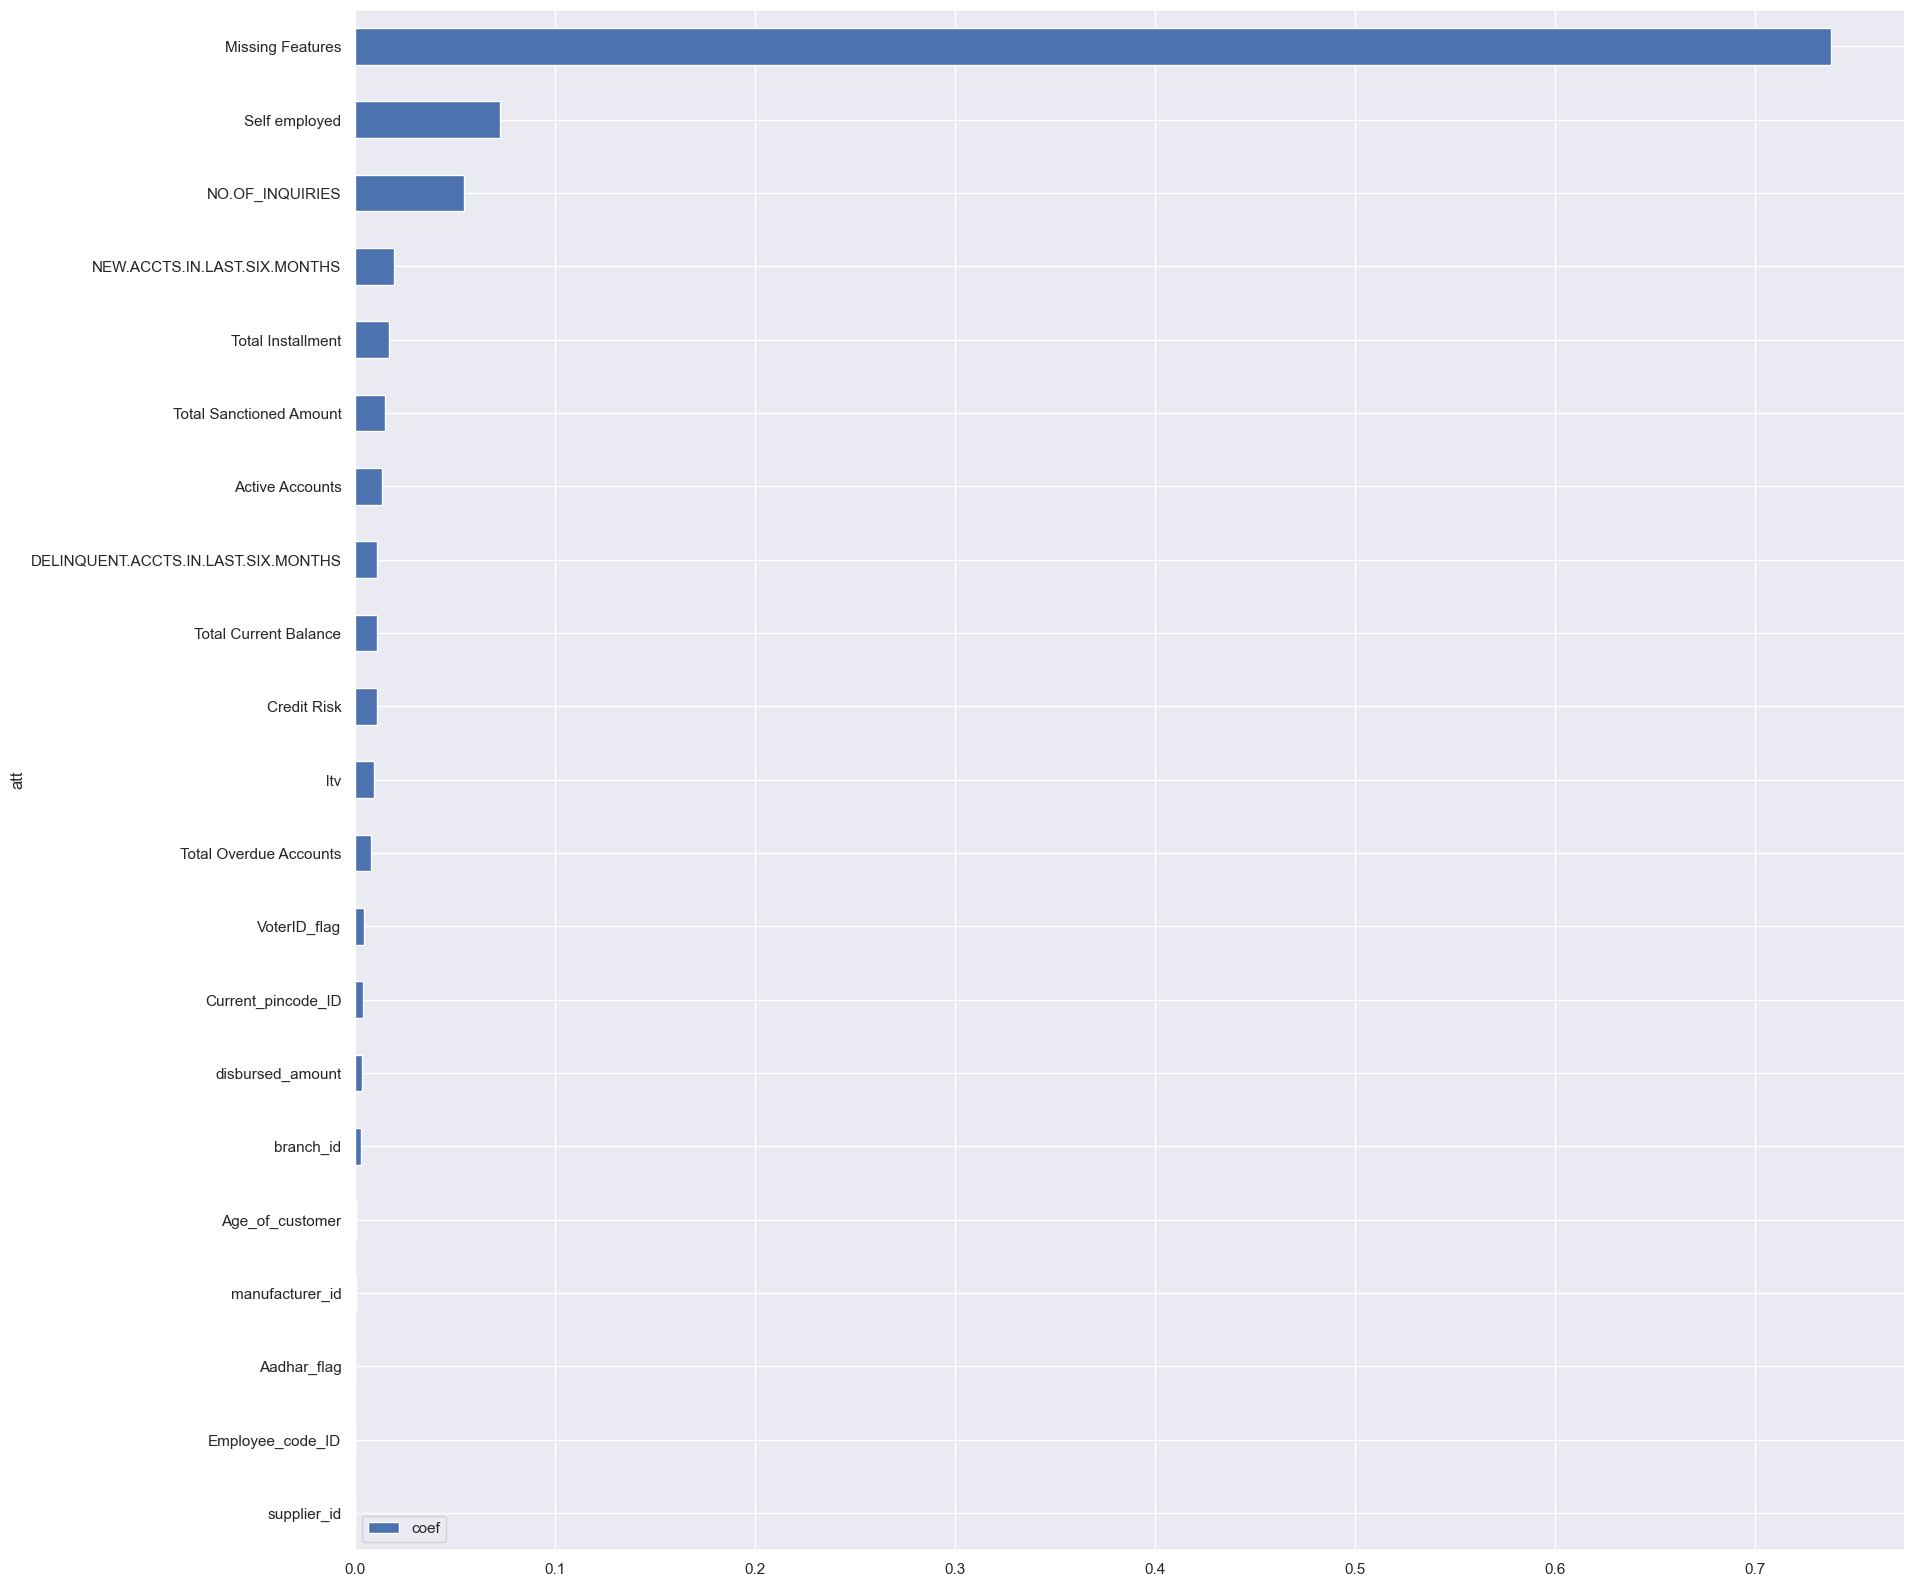

In [107]:
coefs = pd.DataFrame({'att':X.columns, 'coef':model.feature_importances_}).sort_values(by='coef',ascending=True).replace(0,np.nan).dropna()
coefs.plot.barh(x='att',y='coef',figsize=(20, 20))

Možemo da primetimo da pojedini atributi apsolutno ne igraju značajnu ulogu u predviđanju kada je reč o Gradient boosting-u.

In [108]:
X_new=X.drop(['Age_of_customer','manufacturer_id','Aadhar_flag','Employee_code_ID'], axis=1)

In [109]:
X_new

,disbursed_amount,ltv,branch_id,supplier_id,Current_pincode_ID,State_ID,VoterID_flag,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Self employed,Credit Risk,Missing Features,Active Accounts,Total Overdue Accounts,Total Current Balance,Total Sanctioned Amount,Total Installment
0,50578,89.55,67,22807,1441,6,0,0,0,0,0,-1,26,0,0,0,0,0
1,47145,73.23,67,22807,1502,6,0,0,1,0,1,5,13,1,1,27600,50200,1991
2,53278,89.63,67,22807,1497,6,0,0,0,0,1,-1,25,0,0,0,0,0
3,57513,88.48,67,22807,1501,6,0,0,0,1,1,2,18,0,0,0,0,31
4,52378,88.39,67,22807,1495,6,0,0,0,1,1,-1,23,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,63213,60.72,34,20700,1050,6,1,0,0,0,0,10,17,3,0,390443,416133,4084
233150,73651,74.95,34,23775,990,6,1,0,0,0,1,13,20,0,0,0,0,1565
233151,33484,48.45,77,22186,2299,4,0,0,0,0,0,-1,26,0,0,0,0,0
233152,34259,49.10,77,22186,2299,4,0,0,0,0,0,-1,26,0,0,0,0,0


In [110]:
model = GradientBoostingClassifier(n_estimators=100)

scores = cross_val_score(model, X_new, y, cv = 10, scoring='roc_auc')
scores.mean()

0.9419263062613117

Izbacivanjem nepotrebnih atributa, performanse su malo poboljšane.